In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src import ImageQuant2, direcslist, load_image, nb_setup, raw_data_path

nb_setup()
%matplotlib widget

### Data paths

In [2]:
basepath = raw_data_path + "/Imaging/mlc4"
paths = direcslist(basepath, 1)
print(len(paths))

17


### Extract data from paths

In [3]:
dates = []
lines = []
embryo_ids = []
for p in paths:
    code = p.strip("/").split("/")[-2]
    dates.append(code.split("_")[0])
    lines.append(code.split("_")[1])
    # embryo_id = int(os.path.getmtime(glob.glob(p + '/*488 SP 535-50*')[0]))
    # np.savetxt(p + '/EmbryoID.txt', [embryo_id], fmt='%i')
    embryo_ids.append(str(np.loadtxt(p + "/EmbryoID.txt").astype(int)))
print(len(set(embryo_ids)))
df = pd.DataFrame({"Path": paths, "EmbryoID": embryo_ids, "Line": lines, "Date": dates})
df = df[df.Line.isin(["lp637", "nwg240", "nwg338", "nwg376"])]
df["Path"] = df["Path"].apply(lambda x: x[len(raw_data_path) :])
df.to_csv("../../data/mlc4_embryos.csv")
df

17


Path    EmbryoID    Line  \
0   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651686192  nwg376   
1   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651689529  nwg376   
2   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651690158  nwg376   
3   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651691673  nwg376   
4   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651692142  nwg376   
5   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651762677   lp637   
6   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651764081   lp637   
7   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651763515   lp637   
8   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651765815   lp637   
9   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651765978   lp637   
10  /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651766092   lp637   
11  /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651768045   lp637   
12  /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651768497   lp637   
13  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651758810  nwg376   
14  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651759099  nwg376   
15  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651761419  nwg376   
16  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651761965  nwg376   

      Date  
0   220504  
1   220504  
2   220504  
3   220504  
4   220504  
5   220505  
6   220505  
7   220505  
8   220505  
9   220505  
10  220505  
11  220505  
12  220505  
13  220505  
14  220505  
15  220505  
16  220505

### Segment

In [4]:
# results = []
# for index, row in df.iterrows():
#     print(row.Path)

#     # Import movie
#     img = load_image(row.Path + '/af_corrected.tif')
#     roi = np.loadtxt(row.Path + '/ROI_fit_anaphase.txt')

#     # Run quantification
#     iq = ImageQuant2(img=img, roi=roi)
#     iq.segment()

#     # Save ROIs
#     for i, r in enumerate(iq.roi):
#         np.savetxt(row.Path + '/ROI_fit_%s.txt' % i, r)

### Import quantification model

In [5]:
membg = np.loadtxt("../../data/calibration_mem6.txt")
cytbg = np.loadtxt("../../data/calibration_cyt.txt")
calibration_factor = np.loadtxt("../../data/calibration_constants.txt")[6]
print(calibration_factor)

3.105837611328295


### Loop through embryos and quantify

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<11:14,  1.48it/s]

  1%|▉                                                                                                         | 9/1000 [00:00<01:05, 15.03it/s]

  2%|█▊                                                                                                       | 17/1000 [00:00<00:35, 27.66it/s]

  3%|██▋                                                                                                      | 26/1000 [00:00<00:24, 40.20it/s]

  3%|███▌                                                                                                     | 34/1000 [00:01<00:20, 47.94it/s]

  4%|████▍                                                                                                    | 42/1000 [00:01<00:17, 54.82it/s]

  5%|█████▎                                                                                                   | 50/1000 [00:01<00:15, 60.99it/s]

  6%|██████                                                                                                   | 58/1000 [00:01<00:14, 63.46it/s]

  7%|██████▉                                                                                                  | 66/1000 [00:01<00:14, 65.93it/s]

  7%|███████▊                                                                                                 | 74/1000 [00:01<00:15, 61.08it/s]

  8%|████████▌                                                                                                | 81/1000 [00:01<00:14, 61.63it/s]

  9%|█████████▏                                                                                               | 88/1000 [00:01<00:16, 56.20it/s]

  9%|█████████▊                                                                                               | 94/1000 [00:02<00:16, 55.25it/s]

 10%|██████████▍                                                                                             | 100/1000 [00:02<00:16, 54.00it/s]

 11%|███████████                                                                                             | 106/1000 [00:02<00:17, 52.11it/s]

 11%|███████████▋                                                                                            | 112/1000 [00:02<00:17, 50.97it/s]

 12%|████████████▍                                                                                           | 120/1000 [00:02<00:15, 57.57it/s]

 13%|█████████████▍                                                                                          | 129/1000 [00:02<00:13, 64.37it/s]

 14%|██████████████▎                                                                                         | 138/1000 [00:02<00:12, 69.17it/s]

 15%|███████████████▏                                                                                        | 146/1000 [00:02<00:12, 69.22it/s]

 15%|████████████████                                                                                        | 154/1000 [00:02<00:11, 71.17it/s]

 16%|████████████████▊                                                                                       | 162/1000 [00:03<00:11, 72.76it/s]

 17%|█████████████████▊                                                                                      | 171/1000 [00:03<00:10, 75.62it/s]

 18%|██████████████████▌                                                                                     | 179/1000 [00:03<00:10, 76.40it/s]

 19%|███████████████████▍                                                                                    | 187/1000 [00:03<00:10, 76.99it/s]

 20%|████████████████████▍                                                                                   | 196/1000 [00:03<00:10, 79.03it/s]

 20%|█████████████████████▎                                                                                  | 205/1000 [00:03<00:09, 80.68it/s]

 21%|██████████████████████▎                                                                                 | 214/1000 [00:03<00:09, 81.21it/s]

 22%|███████████████████████▏                                                                                | 223/1000 [00:03<00:10, 76.09it/s]

 23%|████████████████████████                                                                                | 231/1000 [00:03<00:10, 74.75it/s]

 24%|████████████████████████▉                                                                               | 240/1000 [00:04<00:09, 77.03it/s]

 25%|█████████████████████████▉                                                                              | 249/1000 [00:04<00:09, 79.20it/s]

 26%|██████████████████████████▊                                                                             | 258/1000 [00:04<00:09, 80.50it/s]

 27%|███████████████████████████▊                                                                            | 267/1000 [00:04<00:09, 81.35it/s]

 28%|████████████████████████████▋                                                                           | 276/1000 [00:04<00:09, 80.03it/s]

 28%|█████████████████████████████▋                                                                          | 285/1000 [00:04<00:08, 81.18it/s]

 29%|██████████████████████████████▌                                                                         | 294/1000 [00:04<00:08, 81.03it/s]

 30%|███████████████████████████████▌                                                                        | 303/1000 [00:04<00:08, 81.74it/s]

 31%|████████████████████████████████▍                                                                       | 312/1000 [00:04<00:08, 81.97it/s]

 32%|█████████████████████████████████▍                                                                      | 321/1000 [00:05<00:08, 82.49it/s]

 33%|██████████████████████████████████▎                                                                     | 330/1000 [00:05<00:08, 82.76it/s]

 34%|███████████████████████████████████▎                                                                    | 339/1000 [00:05<00:07, 82.77it/s]

 35%|████████████████████████████████████▏                                                                   | 348/1000 [00:05<00:07, 82.47it/s]

 36%|█████████████████████████████████████▏                                                                  | 357/1000 [00:05<00:07, 82.16it/s]

 37%|██████████████████████████████████████                                                                  | 366/1000 [00:05<00:07, 81.90it/s]

 38%|███████████████████████████████████████                                                                 | 375/1000 [00:05<00:07, 81.81it/s]

 38%|███████████████████████████████████████▉                                                                | 384/1000 [00:05<00:07, 83.04it/s]

 39%|████████████████████████████████████████▊                                                               | 393/1000 [00:05<00:07, 84.01it/s]

 40%|█████████████████████████████████████████▊                                                              | 402/1000 [00:06<00:07, 81.92it/s]

 41%|██████████████████████████████████████████▋                                                             | 411/1000 [00:06<00:07, 82.11it/s]

 42%|███████████████████████████████████████████▋                                                            | 420/1000 [00:06<00:07, 81.89it/s]

 43%|████████████████████████████████████████████▌                                                           | 429/1000 [00:06<00:06, 82.17it/s]

 44%|█████████████████████████████████████████████▌                                                          | 438/1000 [00:06<00:06, 81.69it/s]

 45%|██████████████████████████████████████████████▍                                                         | 447/1000 [00:06<00:06, 80.21it/s]

 46%|███████████████████████████████████████████████▍                                                        | 456/1000 [00:06<00:06, 80.83it/s]

 46%|████████████████████████████████████████████████▎                                                       | 465/1000 [00:06<00:06, 80.73it/s]

 47%|█████████████████████████████████████████████████▎                                                      | 474/1000 [00:06<00:06, 80.98it/s]

 48%|██████████████████████████████████████████████████▏                                                     | 483/1000 [00:07<00:06, 81.65it/s]

 49%|███████████████████████████████████████████████████▏                                                    | 492/1000 [00:07<00:06, 81.97it/s]

 50%|████████████████████████████████████████████████████                                                    | 501/1000 [00:07<00:06, 81.05it/s]

 51%|█████████████████████████████████████████████████████                                                   | 510/1000 [00:07<00:05, 82.02it/s]

 52%|█████████████████████████████████████████████████████▉                                                  | 519/1000 [00:07<00:05, 83.47it/s]

 53%|██████████████████████████████████████████████████████▉                                                 | 528/1000 [00:07<00:05, 84.27it/s]

 54%|███████████████████████████████████████████████████████▊                                                | 537/1000 [00:07<00:05, 84.61it/s]

 55%|████████████████████████████████████████████████████████▊                                               | 546/1000 [00:07<00:05, 84.54it/s]

 56%|█████████████████████████████████████████████████████████▋                                              | 555/1000 [00:07<00:05, 84.51it/s]

 56%|██████████████████████████████████████████████████████████▋                                             | 564/1000 [00:08<00:05, 84.16it/s]

 57%|███████████████████████████████████████████████████████████▌                                            | 573/1000 [00:08<00:05, 84.09it/s]

 58%|████████████████████████████████████████████████████████████▌                                           | 582/1000 [00:08<00:04, 84.10it/s]

 59%|█████████████████████████████████████████████████████████████▍                                          | 591/1000 [00:08<00:04, 83.99it/s]

 60%|██████████████████████████████████████████████████████████████▍                                         | 600/1000 [00:08<00:04, 84.33it/s]

 61%|███████████████████████████████████████████████████████████████▎                                        | 609/1000 [00:08<00:04, 83.28it/s]

 62%|████████████████████████████████████████████████████████████████▎                                       | 618/1000 [00:08<00:04, 83.21it/s]

 63%|█████████████████████████████████████████████████████████████████▏                                      | 627/1000 [00:08<00:04, 83.12it/s]

 64%|██████████████████████████████████████████████████████████████████▏                                     | 636/1000 [00:08<00:04, 80.64it/s]

 64%|███████████████████████████████████████████████████████████████████                                     | 645/1000 [00:09<00:04, 78.50it/s]

 65%|████████████████████████████████████████████████████████████████████                                    | 654/1000 [00:09<00:04, 79.53it/s]

 66%|████████████████████████████████████████████████████████████████████▉                                   | 663/1000 [00:09<00:04, 79.93it/s]

 67%|█████████████████████████████████████████████████████████████████████▉                                  | 672/1000 [00:09<00:04, 79.91it/s]

 68%|██████████████████████████████████████████████████████████████████████▊                                 | 681/1000 [00:09<00:03, 80.60it/s]

 69%|███████████████████████████████████████████████████████████████████████▊                                | 690/1000 [00:09<00:03, 81.78it/s]

 70%|████████████████████████████████████████████████████████████████████████▋                               | 699/1000 [00:09<00:03, 82.21it/s]

 71%|█████████████████████████████████████████████████████████████████████████▋                              | 708/1000 [00:09<00:03, 81.83it/s]

 72%|██████████████████████████████████████████████████████████████████████████▌                             | 717/1000 [00:09<00:03, 82.65it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                            | 726/1000 [00:10<00:03, 80.89it/s]

 74%|████████████████████████████████████████████████████████████████████████████▍                           | 735/1000 [00:10<00:03, 80.40it/s]

 74%|█████████████████████████████████████████████████████████████████████████████▍                          | 744/1000 [00:10<00:03, 81.57it/s]

 75%|██████████████████████████████████████████████████████████████████████████████▎                         | 753/1000 [00:10<00:02, 82.47it/s]

 76%|███████████████████████████████████████████████████████████████████████████████▏                        | 762/1000 [00:10<00:02, 82.77it/s]

 77%|████████████████████████████████████████████████████████████████████████████████▏                       | 771/1000 [00:10<00:02, 82.80it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████                       | 780/1000 [00:10<00:02, 82.24it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████                      | 789/1000 [00:10<00:02, 80.63it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▉                     | 798/1000 [00:10<00:02, 81.19it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▉                    | 807/1000 [00:10<00:02, 82.11it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▊                   | 816/1000 [00:11<00:02, 82.69it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████▊                  | 825/1000 [00:11<00:02, 82.88it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████▋                 | 834/1000 [00:11<00:02, 82.82it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████▋                | 843/1000 [00:11<00:01, 82.99it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████▌               | 852/1000 [00:11<00:01, 82.28it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████▌              | 861/1000 [00:11<00:01, 81.72it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████▍             | 870/1000 [00:11<00:01, 82.12it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████▍            | 879/1000 [00:11<00:01, 77.93it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████▎           | 888/1000 [00:11<00:01, 79.70it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▎          | 897/1000 [00:12<00:01, 79.74it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏         | 906/1000 [00:12<00:01, 79.94it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████▏        | 915/1000 [00:12<00:01, 80.14it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████        | 924/1000 [00:12<00:00, 81.18it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████       | 933/1000 [00:12<00:00, 82.03it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████▉      | 942/1000 [00:12<00:00, 82.07it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████▉     | 951/1000 [00:12<00:00, 82.39it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████▊    | 960/1000 [00:12<00:00, 82.65it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 969/1000 [00:12<00:00, 82.83it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 978/1000 [00:13<00:00, 82.65it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 987/1000 [00:13<00:00, 82.79it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌| 996/1000 [00:13<00:00, 80.84it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.85it/s]

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<08:24,  1.98it/s]

  1%|█▎                                                                                                       | 13/1000 [00:00<00:35, 27.69it/s]

  2%|██▋                                                                                                      | 25/1000 [00:00<00:19, 49.42it/s]

  4%|███▉                                                                                                     | 37/1000 [00:00<00:14, 67.07it/s]

  5%|█████▎                                                                                                   | 50/1000 [00:00<00:11, 82.21it/s]

  6%|██████▌                                                                                                  | 62/1000 [00:01<00:10, 92.26it/s]

  8%|███████▊                                                                                                | 75/1000 [00:01<00:09, 100.83it/s]

  9%|█████████                                                                                               | 87/1000 [00:01<00:08, 105.68it/s]

 10%|██████████▎                                                                                            | 100/1000 [00:01<00:08, 109.89it/s]

 11%|███████████▌                                                                                           | 112/1000 [00:01<00:08, 110.44it/s]

 12%|████████████▊                                                                                          | 124/1000 [00:01<00:07, 112.58it/s]

 14%|██████████████                                                                                         | 136/1000 [00:01<00:07, 113.55it/s]

 15%|███████████████▏                                                                                       | 148/1000 [00:01<00:07, 113.55it/s]

 16%|████████████████▍                                                                                      | 160/1000 [00:01<00:07, 113.63it/s]

 17%|█████████████████▋                                                                                     | 172/1000 [00:01<00:07, 109.79it/s]

 18%|██████████████████▉                                                                                    | 184/1000 [00:02<00:07, 112.46it/s]

 20%|████████████████████▏                                                                                  | 196/1000 [00:02<00:07, 112.27it/s]

 21%|█████████████████████▍                                                                                 | 208/1000 [00:02<00:07, 109.97it/s]

 22%|██████████████████████▋                                                                                | 220/1000 [00:02<00:07, 110.07it/s]

 23%|███████████████████████▉                                                                               | 232/1000 [00:02<00:06, 110.24it/s]

 24%|█████████████████████████▏                                                                             | 244/1000 [00:02<00:06, 111.43it/s]

 26%|██████████████████████████▎                                                                            | 256/1000 [00:02<00:06, 111.87it/s]

 27%|███████████████████████████▌                                                                           | 268/1000 [00:02<00:06, 112.32it/s]

 28%|████████████████████████████▊                                                                          | 280/1000 [00:02<00:06, 113.36it/s]

 29%|██████████████████████████████                                                                         | 292/1000 [00:03<00:06, 109.90it/s]

 30%|███████████████████████████████▎                                                                       | 304/1000 [00:03<00:06, 111.54it/s]

 32%|████████████████████████████████▌                                                                      | 316/1000 [00:03<00:06, 111.32it/s]

 33%|█████████████████████████████████▊                                                                     | 328/1000 [00:03<00:05, 112.42it/s]

 34%|███████████████████████████████████                                                                    | 340/1000 [00:03<00:05, 112.34it/s]

 35%|████████████████████████████████████▎                                                                  | 352/1000 [00:03<00:05, 113.16it/s]

 36%|█████████████████████████████████████▍                                                                 | 364/1000 [00:03<00:05, 112.53it/s]

 38%|██████████████████████████████████████▋                                                                | 376/1000 [00:03<00:05, 113.28it/s]

 39%|███████████████████████████████████████▉                                                               | 388/1000 [00:03<00:05, 112.74it/s]

 40%|█████████████████████████████████████████▏                                                             | 400/1000 [00:04<00:05, 112.87it/s]

 41%|██████████████████████████████████████████▍                                                            | 412/1000 [00:04<00:05, 112.38it/s]

 42%|███████████████████████████████████████████▋                                                           | 424/1000 [00:04<00:05, 113.21it/s]

 44%|████████████████████████████████████████████▉                                                          | 436/1000 [00:04<00:05, 112.65it/s]

 45%|██████████████████████████████████████████████▏                                                        | 448/1000 [00:04<00:04, 113.44it/s]

 46%|███████████████████████████████████████████████▍                                                       | 460/1000 [00:04<00:04, 113.35it/s]

 47%|████████████████████████████████████████████████▌                                                      | 472/1000 [00:04<00:04, 113.33it/s]

 48%|█████████████████████████████████████████████████▊                                                     | 484/1000 [00:04<00:04, 112.26it/s]

 50%|███████████████████████████████████████████████████                                                    | 496/1000 [00:04<00:04, 113.13it/s]

 51%|████████████████████████████████████████████████████▎                                                  | 508/1000 [00:04<00:04, 112.57it/s]

 52%|█████████████████████████████████████████████████████▌                                                 | 520/1000 [00:05<00:04, 112.22it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 532/1000 [00:05<00:04, 113.03it/s]

 54%|████████████████████████████████████████████████████████                                               | 544/1000 [00:05<00:04, 112.07it/s]

 56%|█████████████████████████████████████████████████████████▎                                             | 556/1000 [00:05<00:03, 112.56it/s]

 57%|██████████████████████████████████████████████████████████▌                                            | 568/1000 [00:05<00:03, 111.99it/s]

 58%|███████████████████████████████████████████████████████████▋                                           | 580/1000 [00:05<00:03, 112.04it/s]

 59%|████████████████████████████████████████████████████████████▉                                          | 592/1000 [00:05<00:03, 112.51it/s]

 60%|██████████████████████████████████████████████████████████████▏                                        | 604/1000 [00:05<00:03, 113.16it/s]

 62%|███████████████████████████████████████████████████████████████▍                                       | 616/1000 [00:05<00:03, 101.87it/s]

 63%|█████████████████████████████████████████████████████████████████▏                                      | 627/1000 [00:06<00:04, 83.54it/s]

 64%|██████████████████████████████████████████████████████████████████▏                                     | 637/1000 [00:06<00:04, 86.45it/s]

 65%|███████████████████████████████████████████████████████████████████▍                                    | 648/1000 [00:06<00:03, 92.17it/s]

 66%|████████████████████████████████████████████████████████████████████▍                                   | 658/1000 [00:06<00:03, 93.53it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 670/1000 [00:06<00:03, 100.03it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 681/1000 [00:06<00:03, 100.91it/s]

 69%|███████████████████████████████████████████████████████████████████████▍                               | 694/1000 [00:06<00:02, 106.59it/s]

 70%|████████████████████████████████████████████████████████████████████████▌                              | 705/1000 [00:06<00:02, 106.33it/s]

 72%|█████████████████████████████████████████████████████████████████████████▋                             | 716/1000 [00:07<00:02, 100.81it/s]

 73%|██████████████████████████████████████████████████████████████████████████▉                            | 727/1000 [00:07<00:02, 101.43it/s]

 74%|████████████████████████████████████████████████████████████████████████████▊                           | 738/1000 [00:07<00:02, 98.06it/s]

 75%|█████████████████████████████████████████████████████████████████████████████▏                         | 749/1000 [00:07<00:02, 100.50it/s]

 76%|██████████████████████████████████████████████████████████████████████████████▎                        | 760/1000 [00:07<00:02, 102.42it/s]

 77%|███████████████████████████████████████████████████████████████████████████████▌                       | 772/1000 [00:07<00:02, 105.39it/s]

 78%|████████████████████████████████████████████████████████████████████████████████▋                      | 783/1000 [00:07<00:02, 105.35it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████▉                     | 795/1000 [00:07<00:01, 107.97it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████                    | 807/1000 [00:07<00:01, 109.97it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 819/1000 [00:07<00:01, 106.03it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 830/1000 [00:08<00:01, 106.53it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▋                | 842/1000 [00:08<00:01, 108.22it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▉               | 854/1000 [00:08<00:01, 108.99it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▏             | 866/1000 [00:08<00:01, 110.24it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▍            | 878/1000 [00:08<00:01, 109.00it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████▋           | 890/1000 [00:08<00:01, 109.80it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████▉          | 902/1000 [00:08<00:00, 109.85it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 914/1000 [00:08<00:00, 111.38it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▍       | 926/1000 [00:08<00:00, 110.98it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▌      | 938/1000 [00:09<00:00, 112.43it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▊     | 950/1000 [00:09<00:00, 113.30it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████    | 962/1000 [00:09<00:00, 112.49it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 974/1000 [00:09<00:00, 113.02it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 986/1000 [00:09<00:00, 110.69it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊| 998/1000 [00:09<00:00, 107.19it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.86it/s]

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<08:11,  2.03it/s]

  2%|█▊                                                                                                       | 17/1000 [00:00<00:26, 37.16it/s]

  3%|███▌                                                                                                     | 34/1000 [00:00<00:14, 68.23it/s]

  5%|█████▏                                                                                                   | 49/1000 [00:00<00:10, 88.67it/s]

  6%|██████▊                                                                                                 | 65/1000 [00:00<00:08, 106.77it/s]

  8%|████████▌                                                                                               | 82/1000 [00:01<00:07, 122.48it/s]

 10%|██████████▏                                                                                             | 98/1000 [00:01<00:06, 132.70it/s]

 12%|███████████▊                                                                                           | 115/1000 [00:01<00:06, 141.12it/s]

 13%|█████████████▌                                                                                         | 132/1000 [00:01<00:05, 147.14it/s]

 15%|███████████████▏                                                                                       | 148/1000 [00:01<00:05, 147.78it/s]

 16%|████████████████▉                                                                                      | 164/1000 [00:01<00:05, 148.99it/s]

 18%|██████████████████▌                                                                                    | 180/1000 [00:01<00:05, 150.73it/s]

 20%|████████████████████▏                                                                                  | 196/1000 [00:01<00:05, 152.48it/s]

 21%|█████████████████████▊                                                                                 | 212/1000 [00:01<00:05, 152.89it/s]

 23%|███████████████████████▌                                                                               | 229/1000 [00:01<00:04, 154.93it/s]

 24%|█████████████████████████▏                                                                             | 245/1000 [00:02<00:04, 154.76it/s]

 26%|██████████████████████████▉                                                                            | 261/1000 [00:02<00:04, 151.65it/s]

 28%|████████████████████████████▌                                                                          | 277/1000 [00:02<00:04, 150.89it/s]

 29%|██████████████████████████████▏                                                                        | 293/1000 [00:02<00:04, 149.05it/s]

 31%|███████████████████████████████▋                                                                       | 308/1000 [00:02<00:04, 147.49it/s]

 32%|█████████████████████████████████▎                                                                     | 324/1000 [00:02<00:04, 150.10it/s]

 34%|███████████████████████████████████                                                                    | 340/1000 [00:02<00:04, 150.08it/s]

 36%|████████████████████████████████████▋                                                                  | 356/1000 [00:02<00:04, 148.90it/s]

 37%|██████████████████████████████████████▎                                                                | 372/1000 [00:02<00:04, 149.75it/s]

 39%|████████████████████████████████████████                                                               | 389/1000 [00:03<00:03, 153.29it/s]

 40%|█████████████████████████████████████████▋                                                             | 405/1000 [00:03<00:04, 145.55it/s]

 42%|███████████████████████████████████████████▎                                                           | 420/1000 [00:03<00:04, 143.06it/s]

 44%|████████████████████████████████████████████▉                                                          | 436/1000 [00:03<00:03, 146.86it/s]

 45%|██████████████████████████████████████████████▌                                                        | 452/1000 [00:03<00:03, 149.44it/s]

 47%|████████████████████████████████████████████████▎                                                      | 469/1000 [00:03<00:03, 153.35it/s]

 48%|█████████████████████████████████████████████████▉                                                     | 485/1000 [00:03<00:03, 153.06it/s]

 50%|███████████████████████████████████████████████████▋                                                   | 502/1000 [00:03<00:03, 155.96it/s]

 52%|█████████████████████████████████████████████████████▎                                                 | 518/1000 [00:03<00:03, 156.25it/s]

 53%|███████████████████████████████████████████████████████                                                | 534/1000 [00:03<00:02, 155.39it/s]

 55%|████████████████████████████████████████████████████████▋                                              | 550/1000 [00:04<00:02, 155.87it/s]

 57%|██████████████████████████████████████████████████████████▎                                            | 566/1000 [00:04<00:02, 156.70it/s]

 58%|████████████████████████████████████████████████████████████                                           | 583/1000 [00:04<00:02, 159.01it/s]

 60%|█████████████████████████████████████████████████████████████▋                                         | 599/1000 [00:04<00:02, 156.09it/s]

 62%|███████████████████████████████████████████████████████████████▎                                       | 615/1000 [00:04<00:02, 156.94it/s]

 63%|████████████████████████████████████████████████████████████████▉                                      | 631/1000 [00:04<00:02, 157.06it/s]

 65%|██████████████████████████████████████████████████████████████████▋                                    | 648/1000 [00:04<00:02, 158.87it/s]

 66%|████████████████████████████████████████████████████████████████████▍                                  | 664/1000 [00:04<00:02, 153.73it/s]

 68%|██████████████████████████████████████████████████████████████████████                                 | 680/1000 [00:04<00:02, 146.70it/s]

 70%|███████████████████████████████████████████████████████████████████████▋                               | 696/1000 [00:05<00:02, 149.02it/s]

 71%|█████████████████████████████████████████████████████████████████████████▎                             | 712/1000 [00:05<00:01, 151.21it/s]

 73%|███████████████████████████████████████████████████████████████████████████                            | 729/1000 [00:05<00:01, 154.28it/s]

 75%|████████████████████████████████████████████████████████████████████████████▊                          | 746/1000 [00:05<00:01, 156.37it/s]

 76%|██████████████████████████████████████████████████████████████████████████████▌                        | 763/1000 [00:05<00:01, 157.83it/s]

 78%|████████████████████████████████████████████████████████████████████████████████▎                      | 780/1000 [00:05<00:01, 158.95it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████▉                     | 796/1000 [00:05<00:01, 158.03it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▋                   | 812/1000 [00:05<00:01, 157.89it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 829/1000 [00:05<00:01, 158.75it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▏               | 846/1000 [00:05<00:00, 160.68it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▉              | 863/1000 [00:06<00:00, 161.33it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▋            | 880/1000 [00:06<00:00, 162.01it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████▍          | 897/1000 [00:06<00:00, 163.21it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 914/1000 [00:06<00:00, 161.63it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▉       | 931/1000 [00:06<00:00, 155.20it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▋     | 948/1000 [00:06<00:00, 158.24it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████▎   | 964/1000 [00:06<00:00, 156.85it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 980/1000 [00:06<00:00, 157.42it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋| 997/1000 [00:06<00:00, 158.35it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 144.13it/s]

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<06:10,  2.69it/s]

  2%|█▋                                                                                                       | 16/1000 [00:00<00:22, 43.43it/s]

  3%|███▍                                                                                                     | 33/1000 [00:00<00:12, 78.35it/s]

  5%|█████                                                                                                   | 49/1000 [00:00<00:09, 100.69it/s]

  7%|██████▊                                                                                                 | 66/1000 [00:00<00:07, 118.76it/s]

  8%|████████▌                                                                                               | 82/1000 [00:00<00:07, 129.52it/s]

 10%|██████████▏                                                                                             | 98/1000 [00:00<00:06, 138.00it/s]

 11%|███████████▋                                                                                           | 114/1000 [00:01<00:06, 140.95it/s]

 13%|█████████████▍                                                                                         | 130/1000 [00:01<00:05, 145.24it/s]

 15%|███████████████▏                                                                                       | 147/1000 [00:01<00:05, 149.58it/s]

 16%|████████████████▉                                                                                      | 164/1000 [00:01<00:05, 153.04it/s]

 18%|██████████████████▌                                                                                    | 180/1000 [00:01<00:05, 152.94it/s]

 20%|████████████████████▏                                                                                  | 196/1000 [00:01<00:05, 153.77it/s]

 21%|█████████████████████▊                                                                                 | 212/1000 [00:01<00:05, 155.15it/s]

 23%|███████████████████████▍                                                                               | 228/1000 [00:01<00:04, 155.70it/s]

 24%|█████████████████████████▏                                                                             | 244/1000 [00:01<00:04, 156.33it/s]

 26%|██████████████████████████▊                                                                            | 260/1000 [00:02<00:04, 157.01it/s]

 28%|████████████████████████████▌                                                                          | 277/1000 [00:02<00:04, 159.14it/s]

 29%|██████████████████████████████▎                                                                        | 294/1000 [00:02<00:04, 160.27it/s]

 31%|████████████████████████████████                                                                       | 311/1000 [00:02<00:04, 160.68it/s]

 33%|█████████████████████████████████▊                                                                     | 328/1000 [00:02<00:04, 157.75it/s]

 34%|███████████████████████████████████▍                                                                   | 344/1000 [00:02<00:04, 155.39it/s]

 36%|█████████████████████████████████████                                                                  | 360/1000 [00:02<00:04, 153.80it/s]

 38%|██████████████████████████████████████▋                                                                | 376/1000 [00:02<00:04, 154.29it/s]

 39%|████████████████████████████████████████▍                                                              | 393/1000 [00:02<00:03, 156.76it/s]

 41%|██████████████████████████████████████████▏                                                            | 409/1000 [00:02<00:03, 156.66it/s]

 43%|███████████████████████████████████████████▉                                                           | 426/1000 [00:03<00:03, 158.55it/s]

 44%|█████████████████████████████████████████████▌                                                         | 442/1000 [00:03<00:03, 157.76it/s]

 46%|███████████████████████████████████████████████▎                                                       | 459/1000 [00:03<00:03, 159.85it/s]

 48%|████████████████████████████████████████████████▉                                                      | 475/1000 [00:03<00:03, 158.97it/s]

 49%|██████████████████████████████████████████████████▌                                                    | 491/1000 [00:03<00:03, 158.77it/s]

 51%|████████████████████████████████████████████████████▎                                                  | 508/1000 [00:03<00:03, 159.46it/s]

 52%|██████████████████████████████████████████████████████                                                 | 525/1000 [00:03<00:02, 160.54it/s]

 54%|███████████████████████████████████████████████████████▊                                               | 542/1000 [00:03<00:02, 154.12it/s]

 56%|█████████████████████████████████████████████████████████▍                                             | 558/1000 [00:03<00:02, 153.76it/s]

 57%|███████████████████████████████████████████████████████████                                            | 574/1000 [00:04<00:02, 153.49it/s]

 59%|████████████████████████████████████████████████████████████▊                                          | 590/1000 [00:04<00:02, 151.46it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 606/1000 [00:04<00:02, 151.29it/s]

 62%|████████████████████████████████████████████████████████████████                                       | 622/1000 [00:04<00:02, 150.52it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 638/1000 [00:04<00:02, 152.45it/s]

 65%|███████████████████████████████████████████████████████████████████▎                                   | 654/1000 [00:04<00:02, 151.82it/s]

 67%|█████████████████████████████████████████████████████████████████████                                  | 670/1000 [00:04<00:02, 154.11it/s]

 69%|██████████████████████████████████████████████████████████████████████▋                                | 686/1000 [00:04<00:02, 152.29it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 702/1000 [00:04<00:02, 147.78it/s]

 72%|█████████████████████████████████████████████████████████████████████████▉                             | 718/1000 [00:04<00:01, 149.41it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 734/1000 [00:05<00:01, 152.34it/s]

 75%|█████████████████████████████████████████████████████████████████████████████▎                         | 751/1000 [00:05<00:01, 155.17it/s]

 77%|███████████████████████████████████████████████████████████████████████████████                        | 767/1000 [00:05<00:01, 155.74it/s]

 78%|████████████████████████████████████████████████████████████████████████████████▋                      | 783/1000 [00:05<00:01, 153.42it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▎                    | 799/1000 [00:05<00:01, 155.13it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████▉                   | 815/1000 [00:05<00:01, 152.91it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▋                 | 832/1000 [00:05<00:01, 155.66it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▎               | 848/1000 [00:05<00:00, 155.22it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████              | 865/1000 [00:05<00:00, 157.26it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▋            | 881/1000 [00:06<00:00, 156.55it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████▍          | 897/1000 [00:06<00:00, 154.32it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████         | 913/1000 [00:06<00:00, 145.38it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▋       | 929/1000 [00:06<00:00, 147.80it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▍     | 946/1000 [00:06<00:00, 151.64it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████    | 962/1000 [00:06<00:00, 150.53it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 978/1000 [00:06<00:00, 151.61it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍| 995/1000 [00:06<00:00, 154.69it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 146.61it/s]

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<08:55,  1.87it/s]

  1%|█▎                                                                                                       | 13/1000 [00:00<00:37, 26.67it/s]

  3%|██▋                                                                                                      | 26/1000 [00:00<00:19, 49.65it/s]

  4%|███▉                                                                                                     | 38/1000 [00:00<00:14, 65.89it/s]

  5%|█████▎                                                                                                   | 51/1000 [00:00<00:11, 81.14it/s]

  6%|██████▊                                                                                                  | 65/1000 [00:01<00:09, 94.89it/s]

  8%|████████                                                                                                | 78/1000 [00:01<00:09, 102.37it/s]

  9%|█████████▌                                                                                              | 92/1000 [00:01<00:08, 110.53it/s]

 11%|██████████▉                                                                                            | 106/1000 [00:01<00:07, 116.41it/s]

 12%|████████████▎                                                                                          | 119/1000 [00:01<00:07, 116.03it/s]

 13%|█████████████▌                                                                                         | 132/1000 [00:01<00:07, 117.07it/s]

 14%|██████████████▉                                                                                        | 145/1000 [00:01<00:07, 120.39it/s]

 16%|████████████████▎                                                                                      | 158/1000 [00:01<00:06, 122.33it/s]

 17%|█████████████████▌                                                                                     | 171/1000 [00:01<00:06, 124.29it/s]

 18%|██████████████████▉                                                                                    | 184/1000 [00:02<00:06, 122.34it/s]

 20%|████████████████████▎                                                                                  | 197/1000 [00:02<00:06, 122.45it/s]

 21%|█████████████████████▋                                                                                 | 211/1000 [00:02<00:06, 125.27it/s]

 22%|███████████████████████                                                                                | 224/1000 [00:02<00:06, 124.00it/s]

 24%|████████████████████████▌                                                                              | 238/1000 [00:02<00:06, 126.21it/s]

 25%|█████████████████████████▊                                                                             | 251/1000 [00:02<00:05, 126.42it/s]

 26%|███████████████████████████▏                                                                           | 264/1000 [00:02<00:05, 123.80it/s]

 28%|████████████████████████████▌                                                                          | 277/1000 [00:02<00:05, 123.47it/s]

 29%|█████████████████████████████▊                                                                         | 290/1000 [00:02<00:05, 123.73it/s]

 30%|███████████████████████████████▏                                                                       | 303/1000 [00:02<00:05, 122.13it/s]

 32%|████████████████████████████████▌                                                                      | 316/1000 [00:03<00:05, 121.02it/s]

 33%|█████████████████████████████████▉                                                                     | 329/1000 [00:03<00:05, 121.77it/s]

 34%|███████████████████████████████████▎                                                                   | 343/1000 [00:03<00:05, 124.78it/s]

 36%|████████████████████████████████████▋                                                                  | 356/1000 [00:03<00:05, 124.49it/s]

 37%|██████████████████████████████████████                                                                 | 369/1000 [00:03<00:05, 123.60it/s]

 38%|███████████████████████████████████████▎                                                               | 382/1000 [00:03<00:05, 122.77it/s]

 40%|████████████████████████████████████████▋                                                              | 395/1000 [00:03<00:04, 121.83it/s]

 41%|██████████████████████████████████████████                                                             | 408/1000 [00:03<00:04, 121.26it/s]

 42%|███████████████████████████████████████████▎                                                           | 421/1000 [00:03<00:04, 122.15it/s]

 43%|████████████████████████████████████████████▋                                                          | 434/1000 [00:04<00:04, 123.33it/s]

 45%|██████████████████████████████████████████████                                                         | 447/1000 [00:04<00:04, 122.79it/s]

 46%|███████████████████████████████████████████████▍                                                       | 460/1000 [00:04<00:04, 123.72it/s]

 47%|████████████████████████████████████████████████▋                                                      | 473/1000 [00:04<00:04, 123.66it/s]

 49%|██████████████████████████████████████████████████                                                     | 486/1000 [00:04<00:04, 122.54it/s]

 50%|███████████████████████████████████████████████████▍                                                   | 499/1000 [00:04<00:04, 119.54it/s]

 51%|████████████████████████████████████████████████████▋                                                  | 511/1000 [00:04<00:04, 113.84it/s]

 52%|█████████████████████████████████████████████████████▊                                                 | 523/1000 [00:04<00:04, 110.45it/s]

 54%|███████████████████████████████████████████████████████                                                | 535/1000 [00:04<00:04, 107.87it/s]

 55%|████████████████████████████████████████████████████████▏                                              | 546/1000 [00:05<00:04, 107.85it/s]

 56%|█████████████████████████████████████████████████████████▍                                             | 558/1000 [00:05<00:03, 111.03it/s]

 57%|██████████████████████████████████████████████████████████▋                                            | 570/1000 [00:05<00:03, 110.89it/s]

 58%|███████████████████████████████████████████████████████████▉                                           | 582/1000 [00:05<00:03, 111.29it/s]

 59%|█████████████████████████████████████████████████████████████▏                                         | 594/1000 [00:05<00:03, 109.42it/s]

 61%|██████████████████████████████████████████████████████████████▍                                        | 606/1000 [00:05<00:03, 112.25it/s]

 62%|███████████████████████████████████████████████████████████████▊                                       | 619/1000 [00:05<00:03, 114.92it/s]

 63%|████████████████████████████████████████████████████████████████▉                                      | 631/1000 [00:05<00:03, 112.02it/s]

 64%|██████████████████████████████████████████████████████████████████▏                                    | 643/1000 [00:05<00:03, 111.99it/s]

 66%|███████████████████████████████████████████████████████████████████▌                                   | 656/1000 [00:06<00:02, 115.80it/s]

 67%|████████████████████████████████████████████████████████████████████▉                                  | 669/1000 [00:06<00:02, 119.35it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 682/1000 [00:06<00:02, 120.59it/s]

 70%|███████████████████████████████████████████████████████████████████████▌                               | 695/1000 [00:06<00:02, 123.21it/s]

 71%|████████████████████████████████████████████████████████████████████████▉                              | 708/1000 [00:06<00:02, 121.34it/s]

 72%|██████████████████████████████████████████████████████████████████████████▎                            | 721/1000 [00:06<00:02, 121.48it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 734/1000 [00:06<00:02, 119.11it/s]

 75%|████████████████████████████████████████████████████████████████████████████▉                          | 747/1000 [00:06<00:02, 121.01it/s]

 76%|██████████████████████████████████████████████████████████████████████████████▎                        | 760/1000 [00:06<00:01, 122.99it/s]

 77%|███████████████████████████████████████████████████████████████████████████████▌                       | 773/1000 [00:06<00:01, 122.35it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████                      | 787/1000 [00:07<00:01, 125.14it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▍                    | 800/1000 [00:07<00:01, 124.18it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▋                   | 813/1000 [00:07<00:01, 124.81it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████                  | 826/1000 [00:07<00:01, 124.10it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▍                | 839/1000 [00:07<00:01, 123.85it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▊               | 852/1000 [00:07<00:01, 124.14it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████              | 865/1000 [00:07<00:01, 124.33it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▍            | 878/1000 [00:07<00:00, 125.33it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████▊           | 891/1000 [00:07<00:00, 126.37it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████          | 904/1000 [00:07<00:00, 124.22it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████▌        | 918/1000 [00:08<00:00, 126.59it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▉       | 931/1000 [00:08<00:00, 126.40it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████▏     | 944/1000 [00:08<00:00, 127.09it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▌    | 957/1000 [00:08<00:00, 121.83it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▉   | 970/1000 [00:08<00:00, 118.21it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 983/1000 [00:08<00:00, 121.00it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌| 996/1000 [00:08<00:00, 123.16it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 113.89it/s]

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<08:42,  1.91it/s]

  1%|█▎                                                                                                       | 13/1000 [00:00<00:36, 27.04it/s]

  2%|██▋                                                                                                      | 25/1000 [00:00<00:20, 48.09it/s]

  4%|███▉                                                                                                     | 37/1000 [00:00<00:14, 65.59it/s]

  5%|█████▏                                                                                                   | 49/1000 [00:00<00:11, 79.59it/s]

  6%|██████▍                                                                                                  | 61/1000 [00:01<00:10, 89.06it/s]

  7%|███████▋                                                                                                 | 73/1000 [00:01<00:09, 95.42it/s]

  9%|████████▉                                                                                               | 86/1000 [00:01<00:08, 103.13it/s]

 10%|██████████▎                                                                                             | 99/1000 [00:01<00:08, 109.01it/s]

 11%|███████████▌                                                                                           | 112/1000 [00:01<00:07, 113.75it/s]

 12%|████████████▉                                                                                          | 125/1000 [00:01<00:07, 116.01it/s]

 14%|██████████████▏                                                                                        | 138/1000 [00:01<00:07, 118.14it/s]

 15%|███████████████▌                                                                                       | 151/1000 [00:01<00:07, 119.19it/s]

 16%|████████████████▉                                                                                      | 164/1000 [00:01<00:06, 120.60it/s]

 18%|██████████████████▏                                                                                    | 177/1000 [00:01<00:06, 119.79it/s]

 19%|███████████████████▌                                                                                   | 190/1000 [00:02<00:06, 118.55it/s]

 20%|████████████████████▉                                                                                  | 203/1000 [00:02<00:06, 119.28it/s]

 22%|██████████████████████▏                                                                                | 216/1000 [00:02<00:06, 120.15it/s]

 23%|███████████████████████▌                                                                               | 229/1000 [00:02<00:06, 121.60it/s]

 24%|█████████████████████████                                                                              | 243/1000 [00:02<00:06, 124.59it/s]

 26%|██████████████████████████▍                                                                            | 257/1000 [00:02<00:05, 126.95it/s]

 27%|███████████████████████████▊                                                                           | 270/1000 [00:02<00:05, 125.81it/s]

 28%|█████████████████████████████▏                                                                         | 283/1000 [00:02<00:05, 125.68it/s]

 30%|██████████████████████████████▍                                                                        | 296/1000 [00:02<00:05, 122.70it/s]

 31%|███████████████████████████████▊                                                                       | 309/1000 [00:03<00:05, 122.88it/s]

 32%|█████████████████████████████████▏                                                                     | 322/1000 [00:03<00:05, 122.88it/s]

 34%|██████████████████████████████████▌                                                                    | 335/1000 [00:03<00:05, 121.24it/s]

 35%|███████████████████████████████████▊                                                                   | 348/1000 [00:03<00:05, 117.84it/s]

 36%|█████████████████████████████████████                                                                  | 360/1000 [00:03<00:05, 117.48it/s]

 37%|██████████████████████████████████████▎                                                                | 372/1000 [00:03<00:05, 118.16it/s]

 38%|███████████████████████████████████████▌                                                               | 384/1000 [00:03<00:05, 116.22it/s]

 40%|████████████████████████████████████████▊                                                              | 396/1000 [00:03<00:05, 115.47it/s]

 41%|██████████████████████████████████████████                                                             | 408/1000 [00:03<00:05, 115.44it/s]

 42%|███████████████████████████████████████████▎                                                           | 421/1000 [00:04<00:04, 117.51it/s]

 43%|████████████████████████████████████████████▋                                                          | 434/1000 [00:04<00:04, 118.57it/s]

 45%|██████████████████████████████████████████████                                                         | 447/1000 [00:04<00:04, 120.57it/s]

 46%|███████████████████████████████████████████████▍                                                       | 460/1000 [00:04<00:04, 121.27it/s]

 47%|████████████████████████████████████████████████▋                                                      | 473/1000 [00:04<00:04, 122.54it/s]

 49%|██████████████████████████████████████████████████                                                     | 486/1000 [00:04<00:04, 121.44it/s]

 50%|███████████████████████████████████████████████████▍                                                   | 499/1000 [00:04<00:04, 119.44it/s]

 51%|████████████████████████████████████████████████████▋                                                  | 512/1000 [00:04<00:04, 119.89it/s]

 52%|██████████████████████████████████████████████████████                                                 | 525/1000 [00:04<00:03, 120.87it/s]

 54%|███████████████████████████████████████████████████████▍                                               | 538/1000 [00:04<00:03, 120.22it/s]

 55%|████████████████████████████████████████████████████████▊                                              | 551/1000 [00:05<00:03, 121.34it/s]

 56%|██████████████████████████████████████████████████████████                                             | 564/1000 [00:05<00:03, 123.80it/s]

 58%|███████████████████████████████████████████████████████████▍                                           | 577/1000 [00:05<00:03, 122.16it/s]

 59%|████████████████████████████████████████████████████████████▊                                          | 590/1000 [00:05<00:03, 123.97it/s]

 60%|██████████████████████████████████████████████████████████████                                         | 603/1000 [00:05<00:03, 120.51it/s]

 62%|███████████████████████████████████████████████████████████████▍                                       | 616/1000 [00:05<00:03, 118.82it/s]

 63%|████████████████████████████████████████████████████████████████▊                                      | 629/1000 [00:05<00:03, 119.43it/s]

 64%|██████████████████████████████████████████████████████████████████▏                                    | 642/1000 [00:05<00:02, 120.39it/s]

 66%|███████████████████████████████████████████████████████████████████▍                                   | 655/1000 [00:05<00:02, 120.76it/s]

 67%|████████████████████████████████████████████████████████████████████▊                                  | 668/1000 [00:06<00:02, 122.21it/s]

 68%|██████████████████████████████████████████████████████████████████████▏                                | 681/1000 [00:06<00:02, 122.88it/s]

 69%|███████████████████████████████████████████████████████████████████████▍                               | 694/1000 [00:06<00:02, 123.43it/s]

 71%|████████████████████████████████████████████████████████████████████████▊                              | 707/1000 [00:06<00:02, 124.02it/s]

 72%|██████████████████████████████████████████████████████████████████████████▏                            | 720/1000 [00:06<00:02, 123.96it/s]

 73%|███████████████████████████████████████████████████████████████████████████▍                           | 733/1000 [00:06<00:02, 123.57it/s]

 75%|████████████████████████████████████████████████████████████████████████████▊                          | 746/1000 [00:06<00:02, 123.15it/s]

 76%|██████████████████████████████████████████████████████████████████████████████▏                        | 759/1000 [00:06<00:01, 123.79it/s]

 77%|███████████████████████████████████████████████████████████████████████████████▌                       | 772/1000 [00:06<00:01, 123.10it/s]

 78%|████████████████████████████████████████████████████████████████████████████████▊                      | 785/1000 [00:07<00:01, 123.34it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▏                    | 798/1000 [00:07<00:01, 124.32it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▌                   | 811/1000 [00:07<00:01, 125.28it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▊                  | 824/1000 [00:07<00:01, 126.28it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▏                | 837/1000 [00:07<00:01, 125.85it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▌               | 850/1000 [00:07<00:01, 124.64it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▉              | 863/1000 [00:07<00:01, 124.10it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▏            | 876/1000 [00:07<00:00, 124.02it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████▌           | 889/1000 [00:07<00:00, 124.80it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████▉          | 902/1000 [00:07<00:00, 125.50it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 915/1000 [00:08<00:00, 125.05it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▌       | 928/1000 [00:08<00:00, 126.03it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▉      | 941/1000 [00:08<00:00, 120.01it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████▎    | 954/1000 [00:08<00:00, 117.73it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▌   | 967/1000 [00:08<00:00, 119.41it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 980/1000 [00:08<00:00, 119.76it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍| 994/1000 [00:08<00:00, 123.22it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.30it/s]

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<08:31,  1.95it/s]

  1%|▉                                                                                                         | 9/1000 [00:00<00:52, 18.86it/s]

  2%|█▊                                                                                                       | 17/1000 [00:00<00:29, 33.18it/s]

  2%|██▋                                                                                                      | 25/1000 [00:00<00:22, 43.93it/s]

  3%|███▍                                                                                                     | 33/1000 [00:00<00:18, 52.08it/s]

  4%|████▎                                                                                                    | 41/1000 [00:01<00:16, 57.84it/s]

  5%|█████▏                                                                                                   | 49/1000 [00:01<00:15, 62.75it/s]

  6%|█████▉                                                                                                   | 57/1000 [00:01<00:14, 65.67it/s]

  6%|██████▊                                                                                                  | 65/1000 [00:01<00:13, 68.49it/s]

  7%|███████▋                                                                                                 | 73/1000 [00:01<00:13, 70.01it/s]

  8%|████████▌                                                                                                | 81/1000 [00:01<00:12, 71.02it/s]

  9%|█████████▎                                                                                               | 89/1000 [00:01<00:12, 72.13it/s]

 10%|██████████▏                                                                                              | 97/1000 [00:01<00:12, 73.20it/s]

 10%|██████████▉                                                                                             | 105/1000 [00:01<00:12, 73.78it/s]

 11%|███████████▊                                                                                            | 113/1000 [00:02<00:11, 74.14it/s]

 12%|████████████▌                                                                                           | 121/1000 [00:02<00:11, 74.53it/s]

 13%|█████████████▍                                                                                          | 129/1000 [00:02<00:11, 74.88it/s]

 14%|██████████████▏                                                                                         | 137/1000 [00:02<00:11, 74.82it/s]

 14%|███████████████                                                                                         | 145/1000 [00:02<00:11, 75.07it/s]

 15%|███████████████▉                                                                                        | 153/1000 [00:02<00:11, 75.18it/s]

 16%|████████████████▋                                                                                       | 161/1000 [00:02<00:11, 75.38it/s]

 17%|█████████████████▌                                                                                      | 169/1000 [00:02<00:11, 74.90it/s]

 18%|██████████████████▍                                                                                     | 177/1000 [00:02<00:10, 75.02it/s]

 18%|███████████████████▏                                                                                    | 185/1000 [00:02<00:10, 75.40it/s]

 19%|████████████████████                                                                                    | 193/1000 [00:03<00:10, 75.13it/s]

 20%|████████████████████▉                                                                                   | 201/1000 [00:03<00:10, 75.34it/s]

 21%|█████████████████████▋                                                                                  | 209/1000 [00:03<00:10, 74.94it/s]

 22%|██████████████████████▌                                                                                 | 217/1000 [00:03<00:10, 74.70it/s]

 22%|███████████████████████▍                                                                                | 225/1000 [00:03<00:10, 75.04it/s]

 23%|████████████████████████▏                                                                               | 233/1000 [00:03<00:10, 74.89it/s]

 24%|█████████████████████████                                                                               | 241/1000 [00:03<00:10, 71.43it/s]

 25%|█████████████████████████▉                                                                              | 249/1000 [00:03<00:10, 72.34it/s]

 26%|██████████████████████████▋                                                                             | 257/1000 [00:03<00:10, 73.06it/s]

 26%|███████████████████████████▌                                                                            | 265/1000 [00:04<00:09, 73.86it/s]

 27%|████████████████████████████▍                                                                           | 273/1000 [00:04<00:09, 74.64it/s]

 28%|█████████████████████████████▏                                                                          | 281/1000 [00:04<00:09, 74.91it/s]

 29%|██████████████████████████████                                                                          | 289/1000 [00:04<00:09, 73.95it/s]

 30%|██████████████████████████████▉                                                                         | 297/1000 [00:04<00:09, 72.69it/s]

 30%|███████████████████████████████▋                                                                        | 305/1000 [00:04<00:09, 73.21it/s]

 31%|████████████████████████████████▌                                                                       | 313/1000 [00:04<00:09, 74.01it/s]

 32%|█████████████████████████████████▍                                                                      | 321/1000 [00:04<00:09, 74.24it/s]

 33%|██████████████████████████████████▏                                                                     | 329/1000 [00:04<00:09, 74.14it/s]

 34%|███████████████████████████████████                                                                     | 337/1000 [00:05<00:08, 74.46it/s]

 34%|███████████████████████████████████▉                                                                    | 345/1000 [00:05<00:08, 74.98it/s]

 35%|████████████████████████████████████▋                                                                   | 353/1000 [00:05<00:08, 75.29it/s]

 36%|█████████████████████████████████████▌                                                                  | 361/1000 [00:05<00:08, 74.88it/s]

 37%|██████████████████████████████████████▍                                                                 | 369/1000 [00:05<00:08, 74.33it/s]

 38%|███████████████████████████████████████▏                                                                | 377/1000 [00:05<00:08, 74.32it/s]

 38%|████████████████████████████████████████                                                                | 385/1000 [00:05<00:08, 72.64it/s]

 39%|████████████████████████████████████████▊                                                               | 393/1000 [00:05<00:08, 73.00it/s]

 40%|█████████████████████████████████████████▋                                                              | 401/1000 [00:05<00:08, 73.24it/s]

 41%|██████████████████████████████████████████▌                                                             | 409/1000 [00:05<00:07, 73.89it/s]

 42%|███████████████████████████████████████████▎                                                            | 417/1000 [00:06<00:07, 73.95it/s]

 42%|████████████████████████████████████████████▏                                                           | 425/1000 [00:06<00:07, 74.71it/s]

 43%|█████████████████████████████████████████████                                                           | 433/1000 [00:06<00:07, 73.73it/s]

 44%|█████████████████████████████████████████████▊                                                          | 441/1000 [00:06<00:07, 70.71it/s]

 45%|██████████████████████████████████████████████▋                                                         | 449/1000 [00:06<00:07, 71.72it/s]

 46%|███████████████████████████████████████████████▌                                                        | 457/1000 [00:06<00:07, 72.64it/s]

 46%|████████████████████████████████████████████████▎                                                       | 465/1000 [00:06<00:07, 73.44it/s]

 47%|█████████████████████████████████████████████████▏                                                      | 473/1000 [00:06<00:07, 74.04it/s]

 48%|██████████████████████████████████████████████████                                                      | 481/1000 [00:06<00:07, 73.47it/s]

 49%|██████████████████████████████████████████████████▊                                                     | 489/1000 [00:07<00:06, 74.13it/s]

 50%|███████████████████████████████████████████████████▋                                                    | 497/1000 [00:07<00:06, 74.68it/s]

 50%|████████████████████████████████████████████████████▌                                                   | 505/1000 [00:07<00:06, 74.04it/s]

 51%|█████████████████████████████████████████████████████▎                                                  | 513/1000 [00:07<00:06, 74.72it/s]

 52%|██████████████████████████████████████████████████████▏                                                 | 521/1000 [00:07<00:06, 73.26it/s]

 53%|███████████████████████████████████████████████████████                                                 | 529/1000 [00:07<00:06, 72.93it/s]

 54%|███████████████████████████████████████████████████████▊                                                | 537/1000 [00:07<00:06, 73.72it/s]

 55%|████████████████████████████████████████████████████████▋                                               | 545/1000 [00:07<00:06, 74.24it/s]

 55%|█████████████████████████████████████████████████████████▌                                              | 553/1000 [00:07<00:06, 72.37it/s]

 56%|██████████████████████████████████████████████████████████▎                                             | 561/1000 [00:08<00:06, 70.76it/s]

 57%|███████████████████████████████████████████████████████████▏                                            | 569/1000 [00:08<00:05, 72.72it/s]

 58%|████████████████████████████████████████████████████████████                                            | 577/1000 [00:08<00:05, 74.04it/s]

 58%|████████████████████████████████████████████████████████████▊                                           | 585/1000 [00:08<00:05, 74.72it/s]

 59%|█████████████████████████████████████████████████████████████▋                                          | 593/1000 [00:08<00:05, 73.74it/s]

 60%|██████████████████████████████████████████████████████████████▌                                         | 601/1000 [00:08<00:05, 74.26it/s]

 61%|███████████████████████████████████████████████████████████████▎                                        | 609/1000 [00:08<00:05, 74.86it/s]

 62%|████████████████████████████████████████████████████████████████▏                                       | 617/1000 [00:08<00:05, 74.62it/s]

 62%|█████████████████████████████████████████████████████████████████                                       | 625/1000 [00:08<00:04, 75.87it/s]

 63%|█████████████████████████████████████████████████████████████████▊                                      | 633/1000 [00:09<00:04, 75.61it/s]

 64%|██████████████████████████████████████████████████████████████████▋                                     | 641/1000 [00:09<00:04, 76.74it/s]

 65%|███████████████████████████████████████████████████████████████████▍                                    | 649/1000 [00:09<00:04, 77.63it/s]

 66%|████████████████████████████████████████████████████████████████████▍                                   | 658/1000 [00:09<00:04, 78.76it/s]

 67%|█████████████████████████████████████████████████████████████████████▎                                  | 666/1000 [00:09<00:04, 78.69it/s]

 67%|██████████████████████████████████████████████████████████████████████                                  | 674/1000 [00:09<00:04, 77.98it/s]

 68%|██████████████████████████████████████████████████████████████████████▉                                 | 682/1000 [00:09<00:04, 77.36it/s]

 69%|███████████████████████████████████████████████████████████████████████▊                                | 690/1000 [00:09<00:04, 76.64it/s]

 70%|████████████████████████████████████████████████████████████████████████▌                               | 698/1000 [00:09<00:03, 75.92it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                              | 706/1000 [00:09<00:03, 76.50it/s]

 72%|██████████████████████████████████████████████████████████████████████████▎                             | 715/1000 [00:10<00:03, 77.81it/s]

 72%|███████████████████████████████████████████████████████████████████████████▎                            | 724/1000 [00:10<00:03, 78.80it/s]

 73%|████████████████████████████████████████████████████████████████████████████▏                           | 732/1000 [00:10<00:03, 77.48it/s]

 74%|█████████████████████████████████████████████████████████████████████████████                           | 741/1000 [00:10<00:03, 78.45it/s]

 75%|█████████████████████████████████████████████████████████████████████████████▉                          | 749/1000 [00:10<00:03, 78.76it/s]

 76%|██████████████████████████████████████████████████████████████████████████████▋                         | 757/1000 [00:10<00:03, 78.73it/s]

 76%|███████████████████████████████████████████████████████████████████████████████▌                        | 765/1000 [00:10<00:02, 78.67it/s]

 77%|████████████████████████████████████████████████████████████████████████████████▍                       | 773/1000 [00:10<00:02, 77.06it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████▏                      | 781/1000 [00:10<00:02, 74.46it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████                      | 789/1000 [00:11<00:02, 75.28it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▉                     | 797/1000 [00:11<00:02, 74.57it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████▋                    | 805/1000 [00:11<00:02, 74.94it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████▌                   | 813/1000 [00:11<00:02, 74.28it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████▍                  | 821/1000 [00:11<00:02, 74.12it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████▏                 | 829/1000 [00:11<00:02, 73.52it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████                 | 837/1000 [00:11<00:02, 73.73it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████▉                | 845/1000 [00:11<00:02, 73.86it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████▋               | 853/1000 [00:11<00:01, 73.98it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████▌              | 861/1000 [00:12<00:01, 73.82it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████▍             | 869/1000 [00:12<00:01, 73.87it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████▏            | 877/1000 [00:12<00:01, 73.92it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████            | 885/1000 [00:12<00:01, 74.02it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████▊           | 893/1000 [00:12<00:01, 73.56it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▋          | 901/1000 [00:12<00:01, 73.40it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▌         | 909/1000 [00:12<00:01, 73.14it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████▎        | 917/1000 [00:12<00:01, 73.26it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████▏       | 925/1000 [00:12<00:01, 72.09it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████       | 933/1000 [00:13<00:00, 72.63it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████▊      | 941/1000 [00:13<00:00, 72.97it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████▋     | 949/1000 [00:13<00:00, 73.42it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████▌    | 957/1000 [00:13<00:00, 73.58it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 965/1000 [00:13<00:00, 74.03it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 973/1000 [00:13<00:00, 74.59it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████  | 981/1000 [00:13<00:00, 68.68it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 988/1000 [00:13<00:00, 62.17it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌| 996/1000 [00:13<00:00, 65.43it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 71.50it/s]

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<07:03,  2.36it/s]

  1%|▉                                                                                                         | 9/1000 [00:00<00:45, 21.76it/s]

  2%|█▊                                                                                                       | 17/1000 [00:00<00:26, 36.90it/s]

  3%|██▋                                                                                                      | 26/1000 [00:00<00:19, 49.74it/s]

  3%|███▌                                                                                                     | 34/1000 [00:00<00:16, 57.88it/s]

  4%|████▍                                                                                                    | 42/1000 [00:00<00:15, 62.84it/s]

  5%|█████▎                                                                                                   | 50/1000 [00:01<00:14, 67.42it/s]

  6%|██████                                                                                                   | 58/1000 [00:01<00:13, 70.57it/s]

  7%|██████▉                                                                                                  | 66/1000 [00:01<00:13, 68.44it/s]

  7%|███████▊                                                                                                 | 74/1000 [00:01<00:13, 69.61it/s]

  8%|████████▌                                                                                                | 82/1000 [00:01<00:13, 70.28it/s]

  9%|█████████▍                                                                                               | 90/1000 [00:01<00:12, 72.88it/s]

 10%|██████████▎                                                                                              | 98/1000 [00:01<00:12, 74.78it/s]

 11%|███████████▏                                                                                            | 107/1000 [00:01<00:11, 76.78it/s]

 12%|███████████▉                                                                                            | 115/1000 [00:01<00:11, 76.64it/s]

 12%|████████████▊                                                                                           | 123/1000 [00:02<00:11, 77.60it/s]

 13%|█████████████▌                                                                                          | 131/1000 [00:02<00:11, 75.91it/s]

 14%|██████████████▍                                                                                         | 139/1000 [00:02<00:11, 75.10it/s]

 15%|███████████████▎                                                                                        | 147/1000 [00:02<00:11, 73.47it/s]

 16%|████████████████                                                                                        | 155/1000 [00:02<00:12, 69.84it/s]

 16%|████████████████▉                                                                                       | 163/1000 [00:02<00:11, 70.19it/s]

 17%|█████████████████▊                                                                                      | 171/1000 [00:02<00:11, 69.58it/s]

 18%|██████████████████▌                                                                                     | 179/1000 [00:02<00:11, 71.06it/s]

 19%|███████████████████▍                                                                                    | 187/1000 [00:02<00:11, 71.34it/s]

 20%|████████████████████▎                                                                                   | 195/1000 [00:03<00:11, 72.01it/s]

 20%|█████████████████████                                                                                   | 203/1000 [00:03<00:11, 71.76it/s]

 21%|█████████████████████▉                                                                                  | 211/1000 [00:03<00:10, 72.84it/s]

 22%|██████████████████████▊                                                                                 | 219/1000 [00:03<00:10, 74.46it/s]

 23%|███████████████████████▌                                                                                | 227/1000 [00:03<00:10, 74.10it/s]

 24%|████████████████████████▍                                                                               | 235/1000 [00:03<00:10, 74.69it/s]

 24%|█████████████████████████▎                                                                              | 243/1000 [00:03<00:10, 74.97it/s]

 25%|██████████████████████████                                                                              | 251/1000 [00:03<00:10, 74.86it/s]

 26%|██████████████████████████▉                                                                             | 259/1000 [00:03<00:09, 74.85it/s]

 27%|███████████████████████████▊                                                                            | 267/1000 [00:03<00:09, 75.07it/s]

 28%|████████████████████████████▌                                                                           | 275/1000 [00:04<00:09, 74.93it/s]

 28%|█████████████████████████████▍                                                                          | 283/1000 [00:04<00:09, 74.50it/s]

 29%|██████████████████████████████▎                                                                         | 291/1000 [00:04<00:09, 75.04it/s]

 30%|███████████████████████████████                                                                         | 299/1000 [00:04<00:09, 74.84it/s]

 31%|███████████████████████████████▉                                                                        | 307/1000 [00:04<00:09, 74.93it/s]

 32%|████████████████████████████████▊                                                                       | 315/1000 [00:04<00:09, 74.62it/s]

 32%|█████████████████████████████████▌                                                                      | 323/1000 [00:04<00:09, 74.27it/s]

 33%|██████████████████████████████████▍                                                                     | 331/1000 [00:04<00:08, 74.89it/s]

 34%|███████████████████████████████████▎                                                                    | 339/1000 [00:04<00:08, 74.62it/s]

 35%|████████████████████████████████████                                                                    | 347/1000 [00:05<00:08, 75.00it/s]

 36%|████████████████████████████████████▉                                                                   | 355/1000 [00:05<00:08, 74.96it/s]

 36%|█████████████████████████████████████▊                                                                  | 363/1000 [00:05<00:08, 74.62it/s]

 37%|██████████████████████████████████████▌                                                                 | 371/1000 [00:05<00:08, 75.23it/s]

 38%|███████████████████████████████████████▍                                                                | 379/1000 [00:05<00:08, 75.98it/s]

 39%|████████████████████████████████████████▏                                                               | 387/1000 [00:05<00:08, 75.24it/s]

 40%|█████████████████████████████████████████                                                               | 395/1000 [00:05<00:07, 75.92it/s]

 40%|██████████████████████████████████████████                                                              | 404/1000 [00:05<00:07, 77.39it/s]

 41%|██████████████████████████████████████████▊                                                             | 412/1000 [00:05<00:07, 77.92it/s]

 42%|███████████████████████████████████████████▋                                                            | 420/1000 [00:06<00:07, 78.17it/s]

 43%|████████████████████████████████████████████▌                                                           | 428/1000 [00:06<00:07, 78.33it/s]

 44%|█████████████████████████████████████████████▎                                                          | 436/1000 [00:06<00:07, 77.08it/s]

 44%|██████████████████████████████████████████████▏                                                         | 444/1000 [00:06<00:07, 77.82it/s]

 45%|███████████████████████████████████████████████                                                         | 452/1000 [00:06<00:06, 78.38it/s]

 46%|███████████████████████████████████████████████▊                                                        | 460/1000 [00:06<00:07, 75.24it/s]

 47%|████████████████████████████████████████████████▊                                                       | 469/1000 [00:06<00:06, 76.85it/s]

 48%|█████████████████████████████████████████████████▌                                                      | 477/1000 [00:06<00:06, 77.00it/s]

 48%|██████████████████████████████████████████████████▍                                                     | 485/1000 [00:06<00:06, 75.62it/s]

 49%|███████████████████████████████████████████████████▍                                                    | 494/1000 [00:06<00:06, 76.87it/s]

 50%|████████████████████████████████████████████████████▎                                                   | 503/1000 [00:07<00:06, 77.90it/s]

 51%|█████████████████████████████████████████████████████▏                                                  | 511/1000 [00:07<00:06, 78.15it/s]

 52%|█████████████████████████████████████████████████████▉                                                  | 519/1000 [00:07<00:06, 78.05it/s]

 53%|██████████████████████████████████████████████████████▊                                                 | 527/1000 [00:07<00:06, 76.90it/s]

 54%|███████████████████████████████████████████████████████▋                                                | 535/1000 [00:07<00:06, 75.19it/s]

 54%|████████████████████████████████████████████████████████▍                                               | 543/1000 [00:07<00:06, 73.35it/s]

 55%|█████████████████████████████████████████████████████████▎                                              | 551/1000 [00:07<00:06, 73.60it/s]

 56%|██████████████████████████████████████████████████████████▏                                             | 559/1000 [00:07<00:05, 73.80it/s]

 57%|██████████████████████████████████████████████████████████▉                                             | 567/1000 [00:07<00:05, 74.07it/s]

 57%|███████████████████████████████████████████████████████████▊                                            | 575/1000 [00:08<00:05, 74.20it/s]

 58%|████████████████████████████████████████████████████████████▋                                           | 583/1000 [00:08<00:05, 74.35it/s]

 59%|█████████████████████████████████████████████████████████████▍                                          | 591/1000 [00:08<00:05, 74.21it/s]

 60%|██████████████████████████████████████████████████████████████▎                                         | 599/1000 [00:08<00:05, 74.79it/s]

 61%|███████████████████████████████████████████████████████████████▏                                        | 607/1000 [00:08<00:05, 75.11it/s]

 62%|███████████████████████████████████████████████████████████████▉                                        | 615/1000 [00:08<00:05, 73.87it/s]

 62%|████████████████████████████████████████████████████████████████▊                                       | 623/1000 [00:08<00:05, 74.13it/s]

 63%|█████████████████████████████████████████████████████████████████▌                                      | 631/1000 [00:08<00:04, 74.28it/s]

 64%|██████████████████████████████████████████████████████████████████▍                                     | 639/1000 [00:08<00:04, 74.50it/s]

 65%|███████████████████████████████████████████████████████████████████▎                                    | 647/1000 [00:09<00:04, 74.01it/s]

 66%|████████████████████████████████████████████████████████████████████                                    | 655/1000 [00:09<00:04, 74.57it/s]

 66%|████████████████████████████████████████████████████████████████████▉                                   | 663/1000 [00:09<00:04, 74.90it/s]

 67%|█████████████████████████████████████████████████████████████████████▊                                  | 671/1000 [00:09<00:04, 74.95it/s]

 68%|██████████████████████████████████████████████████████████████████████▌                                 | 679/1000 [00:09<00:04, 75.25it/s]

 69%|███████████████████████████████████████████████████████████████████████▍                                | 687/1000 [00:09<00:04, 75.66it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                               | 695/1000 [00:09<00:04, 75.74it/s]

 70%|█████████████████████████████████████████████████████████████████████████                               | 703/1000 [00:09<00:03, 76.73it/s]

 71%|██████████████████████████████████████████████████████████████████████████                              | 712/1000 [00:09<00:03, 77.81it/s]

 72%|██████████████████████████████████████████████████████████████████████████▉                             | 721/1000 [00:09<00:03, 78.59it/s]

 73%|███████████████████████████████████████████████████████████████████████████▊                            | 729/1000 [00:10<00:03, 77.85it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                           | 737/1000 [00:10<00:03, 76.98it/s]

 74%|█████████████████████████████████████████████████████████████████████████████▍                          | 745/1000 [00:10<00:03, 73.19it/s]

 75%|██████████████████████████████████████████████████████████████████████████████▎                         | 753/1000 [00:10<00:03, 74.05it/s]

 76%|███████████████████████████████████████████████████████████████████████████████▏                        | 761/1000 [00:10<00:03, 74.37it/s]

 77%|███████████████████████████████████████████████████████████████████████████████▉                        | 769/1000 [00:10<00:03, 75.10it/s]

 78%|████████████████████████████████████████████████████████████████████████████████▊                       | 777/1000 [00:10<00:02, 76.31it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████▋                      | 785/1000 [00:10<00:02, 76.07it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████▌                     | 794/1000 [00:10<00:02, 77.67it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████▍                    | 802/1000 [00:11<00:02, 77.97it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████▏                   | 810/1000 [00:11<00:02, 78.29it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████                   | 818/1000 [00:11<00:02, 76.34it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▉                  | 826/1000 [00:11<00:02, 77.21it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████▋                 | 834/1000 [00:11<00:02, 77.49it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████▌                | 842/1000 [00:11<00:02, 77.91it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████▍               | 850/1000 [00:11<00:01, 77.22it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████▎              | 859/1000 [00:11<00:01, 77.85it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████▏             | 867/1000 [00:11<00:01, 77.76it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████             | 875/1000 [00:12<00:01, 77.22it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████▊            | 883/1000 [00:12<00:01, 77.20it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████▋           | 891/1000 [00:12<00:01, 76.82it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▍          | 899/1000 [00:12<00:01, 75.98it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▎         | 907/1000 [00:12<00:01, 75.88it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████▏        | 915/1000 [00:12<00:01, 75.66it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████▉        | 923/1000 [00:12<00:01, 76.88it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████▊       | 931/1000 [00:12<00:00, 77.43it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████▋      | 939/1000 [00:12<00:00, 78.02it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████▌     | 948/1000 [00:12<00:00, 78.91it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████▍    | 956/1000 [00:13<00:00, 78.77it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 964/1000 [00:13<00:00, 77.52it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████   | 972/1000 [00:13<00:00, 75.82it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 980/1000 [00:13<00:00, 75.35it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 988/1000 [00:13<00:00, 75.66it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌| 996/1000 [00:13<00:00, 75.56it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.35it/s]

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<08:44,  1.90it/s]

  1%|█▎                                                                                                       | 12/1000 [00:00<00:39, 25.01it/s]

  2%|██▌                                                                                                      | 24/1000 [00:00<00:21, 46.39it/s]

  4%|███▊                                                                                                     | 36/1000 [00:00<00:15, 63.59it/s]

  5%|█████                                                                                                    | 48/1000 [00:00<00:12, 76.83it/s]

  6%|██████▎                                                                                                  | 60/1000 [00:01<00:10, 87.32it/s]

  7%|███████▌                                                                                                 | 72/1000 [00:01<00:09, 95.41it/s]

  8%|████████▋                                                                                               | 84/1000 [00:01<00:09, 101.36it/s]

 10%|█████████▉                                                                                              | 96/1000 [00:01<00:08, 105.44it/s]

 11%|███████████                                                                                            | 108/1000 [00:01<00:08, 108.70it/s]

 12%|████████████▎                                                                                          | 120/1000 [00:01<00:07, 111.21it/s]

 13%|█████████████▌                                                                                         | 132/1000 [00:01<00:07, 111.97it/s]

 14%|██████████████▊                                                                                        | 144/1000 [00:01<00:07, 112.48it/s]

 16%|████████████████                                                                                       | 156/1000 [00:01<00:07, 114.59it/s]

 17%|█████████████████▎                                                                                     | 168/1000 [00:01<00:07, 114.93it/s]

 18%|██████████████████▌                                                                                    | 180/1000 [00:02<00:07, 115.06it/s]

 19%|███████████████████▊                                                                                   | 192/1000 [00:02<00:06, 115.82it/s]

 20%|█████████████████████                                                                                  | 204/1000 [00:02<00:06, 117.02it/s]

 22%|██████████████████████▏                                                                                | 216/1000 [00:02<00:06, 114.91it/s]

 23%|███████████████████████▍                                                                               | 228/1000 [00:02<00:06, 114.27it/s]

 24%|████████████████████████▋                                                                              | 240/1000 [00:02<00:06, 113.78it/s]

 25%|█████████████████████████▉                                                                             | 252/1000 [00:02<00:06, 113.36it/s]

 26%|███████████████████████████▏                                                                           | 264/1000 [00:02<00:06, 106.90it/s]

 28%|████████████████████████████▎                                                                          | 275/1000 [00:02<00:06, 106.51it/s]

 29%|█████████████████████████████▌                                                                         | 287/1000 [00:03<00:06, 107.90it/s]

 30%|██████████████████████████████▊                                                                        | 299/1000 [00:03<00:06, 108.67it/s]

 31%|████████████████████████████████                                                                       | 311/1000 [00:03<00:06, 109.64it/s]

 32%|█████████████████████████████████▎                                                                     | 323/1000 [00:03<00:06, 110.37it/s]

 34%|██████████████████████████████████▌                                                                    | 335/1000 [00:03<00:05, 111.61it/s]

 35%|███████████████████████████████████▋                                                                   | 347/1000 [00:03<00:05, 111.69it/s]

 36%|████████████████████████████████████▉                                                                  | 359/1000 [00:03<00:05, 111.65it/s]

 37%|██████████████████████████████████████▏                                                                | 371/1000 [00:03<00:05, 106.56it/s]

 38%|███████████████████████████████████████▎                                                               | 382/1000 [00:03<00:05, 107.18it/s]

 39%|████████████████████████████████████████▌                                                              | 394/1000 [00:04<00:05, 108.13it/s]

 40%|█████████████████████████████████████████▋                                                             | 405/1000 [00:04<00:05, 106.46it/s]

 42%|██████████████████████████████████████████▊                                                            | 416/1000 [00:04<00:05, 103.34it/s]

 43%|████████████████████████████████████████████                                                           | 428/1000 [00:04<00:05, 105.37it/s]

 44%|█████████████████████████████████████████████▎                                                         | 440/1000 [00:04<00:05, 106.74it/s]

 45%|██████████████████████████████████████████████▍                                                        | 451/1000 [00:04<00:05, 106.17it/s]

 46%|███████████████████████████████████████████████▌                                                       | 462/1000 [00:04<00:05, 105.02it/s]

 47%|████████████████████████████████████████████████▋                                                      | 473/1000 [00:04<00:04, 105.97it/s]

 48%|█████████████████████████████████████████████████▊                                                     | 484/1000 [00:04<00:04, 105.16it/s]

 50%|██████████████████████████████████████████████████▉                                                    | 495/1000 [00:05<00:04, 103.63it/s]

 51%|████████████████████████████████████████████████████▏                                                  | 507/1000 [00:05<00:04, 106.35it/s]

 52%|█████████████████████████████████████████████████████▍                                                 | 519/1000 [00:05<00:04, 108.01it/s]

 53%|██████████████████████████████████████████████████████▋                                                | 531/1000 [00:05<00:04, 109.34it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 543/1000 [00:05<00:04, 110.20it/s]

 56%|█████████████████████████████████████████████████████████▏                                             | 555/1000 [00:05<00:04, 108.32it/s]

 57%|██████████████████████████████████████████████████████████▍                                            | 567/1000 [00:05<00:03, 109.36it/s]

 58%|███████████████████████████████████████████████████████████▋                                           | 579/1000 [00:05<00:03, 110.17it/s]

 59%|████████████████████████████████████████████████████████████▊                                          | 591/1000 [00:05<00:03, 110.80it/s]

 60%|██████████████████████████████████████████████████████████████                                         | 603/1000 [00:05<00:03, 111.12it/s]

 62%|███████████████████████████████████████████████████████████████▎                                       | 615/1000 [00:06<00:03, 111.09it/s]

 63%|████████████████████████████████████████████████████████████████▌                                      | 627/1000 [00:06<00:03, 111.06it/s]

 64%|█████████████████████████████████████████████████████████████████▊                                     | 639/1000 [00:06<00:03, 110.83it/s]

 65%|███████████████████████████████████████████████████████████████████                                    | 651/1000 [00:06<00:03, 110.85it/s]

 66%|████████████████████████████████████████████████████████████████████▎                                  | 663/1000 [00:06<00:03, 110.36it/s]

 68%|█████████████████████████████████████████████████████████████████████▌                                 | 675/1000 [00:06<00:02, 110.55it/s]

 69%|██████████████████████████████████████████████████████████████████████▊                                | 687/1000 [00:06<00:02, 110.99it/s]

 70%|███████████████████████████████████████████████████████████████████████▉                               | 699/1000 [00:06<00:02, 111.17it/s]

 71%|█████████████████████████████████████████████████████████████████████████▏                             | 711/1000 [00:06<00:02, 111.55it/s]

 72%|██████████████████████████████████████████████████████████████████████████▍                            | 723/1000 [00:07<00:02, 111.16it/s]

 74%|███████████████████████████████████████████████████████████████████████████▋                           | 735/1000 [00:07<00:02, 111.26it/s]

 75%|████████████████████████████████████████████████████████████████████████████▉                          | 747/1000 [00:07<00:02, 111.44it/s]

 76%|██████████████████████████████████████████████████████████████████████████████▏                        | 759/1000 [00:07<00:02, 111.18it/s]

 77%|███████████████████████████████████████████████████████████████████████████████▍                       | 771/1000 [00:07<00:02, 111.47it/s]

 78%|████████████████████████████████████████████████████████████████████████████████▋                      | 783/1000 [00:07<00:01, 110.49it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████▉                     | 795/1000 [00:07<00:01, 110.05it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████                    | 807/1000 [00:07<00:01, 108.68it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▎                  | 819/1000 [00:07<00:01, 109.72it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▌                 | 831/1000 [00:08<00:01, 110.23it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▊                | 843/1000 [00:08<00:01, 110.82it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████               | 855/1000 [00:08<00:01, 110.97it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▎             | 867/1000 [00:08<00:01, 111.66it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▌            | 879/1000 [00:08<00:01, 111.78it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████▊           | 891/1000 [00:08<00:00, 111.55it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████          | 903/1000 [00:08<00:00, 111.79it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 915/1000 [00:08<00:00, 111.84it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▍       | 927/1000 [00:08<00:00, 111.65it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▋      | 939/1000 [00:09<00:00, 110.15it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▉     | 951/1000 [00:09<00:00, 105.52it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████    | 962/1000 [00:09<00:00, 105.05it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 973/1000 [00:09<00:00, 100.28it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 984/1000 [00:09<00:00, 97.06it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍| 994/1000 [00:09<00:00, 96.17it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.63it/s]

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<06:44,  2.47it/s]

  1%|█▏                                                                                                       | 11/1000 [00:00<00:35, 27.66it/s]

  2%|██▎                                                                                                      | 22/1000 [00:00<00:20, 48.65it/s]

  3%|███▌                                                                                                     | 34/1000 [00:00<00:14, 67.09it/s]

  4%|████▋                                                                                                    | 45/1000 [00:00<00:12, 77.68it/s]

  6%|█████▉                                                                                                   | 57/1000 [00:00<00:10, 87.87it/s]

  7%|███████▏                                                                                                 | 69/1000 [00:01<00:09, 94.67it/s]

  8%|████████▍                                                                                                | 80/1000 [00:01<00:09, 98.77it/s]

  9%|█████████▌                                                                                               | 91/1000 [00:01<00:09, 97.91it/s]

 10%|██████████▌                                                                                            | 102/1000 [00:01<00:08, 100.33it/s]

 11%|███████████▋                                                                                           | 113/1000 [00:01<00:08, 102.45it/s]

 12%|████████████▊                                                                                          | 124/1000 [00:01<00:08, 103.71it/s]

 14%|█████████████▉                                                                                         | 135/1000 [00:01<00:08, 104.68it/s]

 15%|███████████████                                                                                        | 146/1000 [00:01<00:08, 105.14it/s]

 16%|████████████████▏                                                                                      | 157/1000 [00:01<00:08, 105.24it/s]

 17%|█████████████████▎                                                                                     | 168/1000 [00:01<00:07, 105.58it/s]

 18%|██████████████████▍                                                                                    | 179/1000 [00:02<00:07, 105.80it/s]

 19%|███████████████████▌                                                                                   | 190/1000 [00:02<00:07, 105.23it/s]

 20%|████████████████████▋                                                                                  | 201/1000 [00:02<00:07, 103.43it/s]

 21%|██████████████████████                                                                                  | 212/1000 [00:02<00:08, 89.69it/s]

 22%|███████████████████████▏                                                                                | 223/1000 [00:02<00:08, 94.27it/s]

 23%|████████████████████████▎                                                                               | 234/1000 [00:02<00:07, 97.46it/s]

 24%|█████████████████████████▍                                                                              | 245/1000 [00:02<00:07, 99.61it/s]

 26%|██████████████████████████▎                                                                            | 256/1000 [00:02<00:07, 100.67it/s]

 27%|███████████████████████████▌                                                                           | 267/1000 [00:02<00:07, 101.58it/s]

 28%|████████████████████████████▋                                                                          | 278/1000 [00:03<00:07, 102.06it/s]

 29%|█████████████████████████████▊                                                                         | 289/1000 [00:03<00:06, 103.00it/s]

 30%|██████████████████████████████▉                                                                        | 300/1000 [00:03<00:06, 104.59it/s]

 31%|████████████████████████████████                                                                       | 311/1000 [00:03<00:06, 105.77it/s]

 32%|█████████████████████████████████▏                                                                     | 322/1000 [00:03<00:06, 105.76it/s]

 33%|██████████████████████████████████▎                                                                    | 333/1000 [00:03<00:06, 105.37it/s]

 34%|███████████████████████████████████▍                                                                   | 344/1000 [00:03<00:06, 105.56it/s]

 36%|████████████████████████████████████▌                                                                  | 355/1000 [00:03<00:06, 105.89it/s]

 37%|█████████████████████████████████████▋                                                                 | 366/1000 [00:03<00:06, 105.28it/s]

 38%|██████████████████████████████████████▊                                                                | 377/1000 [00:04<00:05, 105.58it/s]

 39%|███████████████████████████████████████▉                                                               | 388/1000 [00:04<00:05, 103.94it/s]

 40%|█████████████████████████████████████████                                                              | 399/1000 [00:04<00:05, 103.90it/s]

 41%|██████████████████████████████████████████▏                                                            | 410/1000 [00:04<00:05, 103.69it/s]

 42%|███████████████████████████████████████████▎                                                           | 421/1000 [00:04<00:05, 104.69it/s]

 43%|████████████████████████████████████████████▍                                                          | 432/1000 [00:04<00:05, 105.86it/s]

 44%|█████████████████████████████████████████████▋                                                         | 443/1000 [00:04<00:05, 105.23it/s]

 45%|██████████████████████████████████████████████▊                                                        | 454/1000 [00:04<00:05, 105.16it/s]

 46%|███████████████████████████████████████████████▉                                                       | 465/1000 [00:04<00:05, 104.46it/s]

 48%|█████████████████████████████████████████████████                                                      | 476/1000 [00:04<00:04, 105.40it/s]

 49%|██████████████████████████████████████████████████▏                                                    | 487/1000 [00:05<00:04, 105.57it/s]

 50%|███████████████████████████████████████████████████▎                                                   | 498/1000 [00:05<00:04, 105.96it/s]

 51%|████████████████████████████████████████████████████▍                                                  | 509/1000 [00:05<00:04, 105.42it/s]

 52%|█████████████████████████████████████████████████████▌                                                 | 520/1000 [00:05<00:04, 105.20it/s]

 53%|██████████████████████████████████████████████████████▊                                                | 532/1000 [00:05<00:04, 107.70it/s]

 54%|███████████████████████████████████████████████████████▉                                               | 543/1000 [00:05<00:04, 107.87it/s]

 56%|█████████████████████████████████████████████████████████▏                                             | 555/1000 [00:05<00:04, 108.53it/s]

 57%|██████████████████████████████████████████████████████████▍                                            | 567/1000 [00:05<00:03, 109.11it/s]

 58%|███████████████████████████████████████████████████████████▌                                           | 578/1000 [00:05<00:03, 106.77it/s]

 59%|████████████████████████████████████████████████████████████▋                                          | 589/1000 [00:06<00:03, 104.83it/s]

 60%|█████████████████████████████████████████████████████████████▊                                         | 600/1000 [00:06<00:03, 105.20it/s]

 61%|███████████████████████████████████████████████████████████████                                        | 612/1000 [00:06<00:03, 107.29it/s]

 62%|████████████████████████████████████████████████████████████████▎                                      | 624/1000 [00:06<00:03, 108.37it/s]

 64%|█████████████████████████████████████████████████████████████████▌                                     | 636/1000 [00:06<00:03, 108.93it/s]

 65%|██████████████████████████████████████████████████████████████████▋                                    | 647/1000 [00:06<00:03, 107.98it/s]

 66%|███████████████████████████████████████████████████████████████████▊                                   | 658/1000 [00:06<00:03, 107.45it/s]

 67%|████████████████████████████████████████████████████████████████████▉                                  | 669/1000 [00:06<00:03, 107.19it/s]

 68%|██████████████████████████████████████████████████████████████████████                                 | 680/1000 [00:06<00:02, 107.23it/s]

 69%|███████████████████████████████████████████████████████████████████████▏                               | 691/1000 [00:06<00:02, 107.61it/s]

 70%|████████████████████████████████████████████████████████████████████████▎                              | 702/1000 [00:07<00:02, 104.80it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 713/1000 [00:07<00:02, 105.33it/s]

 72%|██████████████████████████████████████████████████████████████████████████▋                            | 725/1000 [00:07<00:02, 107.64it/s]

 74%|███████████████████████████████████████████████████████████████████████████▊                           | 736/1000 [00:07<00:02, 107.36it/s]

 75%|████████████████████████████████████████████████████████████████████████████▉                          | 747/1000 [00:07<00:02, 106.58it/s]

 76%|██████████████████████████████████████████████████████████████████████████████                         | 758/1000 [00:07<00:02, 106.09it/s]

 77%|███████████████████████████████████████████████████████████████████████████████▏                       | 769/1000 [00:07<00:02, 106.24it/s]

 78%|████████████████████████████████████████████████████████████████████████████████▎                      | 780/1000 [00:07<00:02, 106.68it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████▍                     | 791/1000 [00:07<00:01, 107.02it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▌                    | 802/1000 [00:08<00:01, 106.40it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▋                   | 813/1000 [00:08<00:01, 105.35it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▊                  | 824/1000 [00:08<00:01, 105.57it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████                 | 835/1000 [00:08<00:01, 105.86it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▏               | 846/1000 [00:08<00:01, 106.20it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▎              | 857/1000 [00:08<00:01, 106.07it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▍             | 868/1000 [00:08<00:01, 106.37it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▌            | 879/1000 [00:08<00:01, 105.78it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████▋           | 890/1000 [00:08<00:01, 105.98it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████▊          | 901/1000 [00:08<00:00, 106.44it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████▉         | 912/1000 [00:09<00:00, 106.71it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████        | 923/1000 [00:09<00:00, 106.73it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████▏      | 934/1000 [00:09<00:00, 107.10it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████▎     | 945/1000 [00:09<00:00, 107.10it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▍    | 956/1000 [00:09<00:00, 106.94it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▌   | 967/1000 [00:09<00:00, 106.85it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 978/1000 [00:09<00:00, 107.23it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 989/1000 [00:09<00:00, 107.08it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.98it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.20it/s]

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<06:58,  2.38it/s]

  1%|█▎                                                                                                       | 12/1000 [00:00<00:33, 29.21it/s]

  2%|██▍                                                                                                      | 23/1000 [00:00<00:19, 49.41it/s]

  4%|███▋                                                                                                     | 35/1000 [00:00<00:14, 66.98it/s]

  5%|████▉                                                                                                    | 47/1000 [00:00<00:11, 79.80it/s]

  6%|██████                                                                                                   | 58/1000 [00:00<00:10, 88.14it/s]

  7%|███████▏                                                                                                 | 69/1000 [00:01<00:09, 93.32it/s]

  8%|████████▍                                                                                                | 80/1000 [00:01<00:09, 97.65it/s]

  9%|█████████▌                                                                                               | 91/1000 [00:01<00:09, 99.96it/s]

 10%|██████████▌                                                                                            | 102/1000 [00:01<00:08, 101.67it/s]

 11%|███████████▋                                                                                           | 113/1000 [00:01<00:08, 102.66it/s]

 12%|████████████▊                                                                                          | 124/1000 [00:01<00:08, 104.44it/s]

 14%|█████████████▉                                                                                         | 135/1000 [00:01<00:08, 105.42it/s]

 15%|███████████████                                                                                        | 146/1000 [00:01<00:08, 106.56it/s]

 16%|████████████████▏                                                                                      | 157/1000 [00:01<00:07, 107.53it/s]

 17%|█████████████████▎                                                                                     | 168/1000 [00:01<00:07, 107.04it/s]

 18%|██████████████████▍                                                                                    | 179/1000 [00:02<00:07, 107.53it/s]

 19%|███████████████████▌                                                                                   | 190/1000 [00:02<00:07, 107.58it/s]

 20%|████████████████████▋                                                                                  | 201/1000 [00:02<00:07, 107.81it/s]

 21%|█████████████████████▊                                                                                 | 212/1000 [00:02<00:07, 108.05it/s]

 22%|██████████████████████▉                                                                                | 223/1000 [00:02<00:07, 107.79it/s]

 23%|████████████████████████                                                                               | 234/1000 [00:02<00:07, 108.05it/s]

 24%|█████████████████████████▏                                                                             | 245/1000 [00:02<00:06, 107.92it/s]

 26%|██████████████████████████▎                                                                            | 256/1000 [00:02<00:06, 108.33it/s]

 27%|███████████████████████████▌                                                                           | 267/1000 [00:02<00:06, 108.82it/s]

 28%|████████████████████████████▋                                                                          | 279/1000 [00:02<00:06, 109.14it/s]

 29%|█████████████████████████████▊                                                                         | 290/1000 [00:03<00:06, 109.22it/s]

 30%|███████████████████████████████                                                                        | 301/1000 [00:03<00:06, 108.26it/s]

 31%|████████████████████████████████▏                                                                      | 312/1000 [00:03<00:06, 107.65it/s]

 32%|█████████████████████████████████▎                                                                     | 323/1000 [00:03<00:06, 107.76it/s]

 33%|██████████████████████████████████▍                                                                    | 334/1000 [00:03<00:06, 108.21it/s]

 34%|███████████████████████████████████▌                                                                   | 345/1000 [00:03<00:06, 107.11it/s]

 36%|████████████████████████████████████▋                                                                  | 356/1000 [00:03<00:05, 107.79it/s]

 37%|█████████████████████████████████████▊                                                                 | 367/1000 [00:03<00:05, 107.79it/s]

 38%|███████████████████████████████████████                                                                | 379/1000 [00:03<00:05, 108.68it/s]

 39%|████████████████████████████████████████▏                                                              | 390/1000 [00:04<00:05, 108.22it/s]

 40%|█████████████████████████████████████████▎                                                             | 401/1000 [00:04<00:05, 108.55it/s]

 41%|██████████████████████████████████████████▍                                                            | 412/1000 [00:04<00:05, 108.40it/s]

 42%|███████████████████████████████████████████▌                                                           | 423/1000 [00:04<00:05, 108.69it/s]

 43%|████████████████████████████████████████████▋                                                          | 434/1000 [00:04<00:05, 108.94it/s]

 44%|█████████████████████████████████████████████▊                                                         | 445/1000 [00:04<00:05, 103.47it/s]

 46%|███████████████████████████████████████████████▍                                                        | 456/1000 [00:04<00:05, 97.96it/s]

 47%|████████████████████████████████████████████████▍                                                       | 466/1000 [00:04<00:05, 93.99it/s]

 48%|█████████████████████████████████████████████████▌                                                      | 476/1000 [00:04<00:05, 91.69it/s]

 49%|██████████████████████████████████████████████████▌                                                     | 486/1000 [00:05<00:05, 91.78it/s]

 50%|███████████████████████████████████████████████████▋                                                    | 497/1000 [00:05<00:05, 95.06it/s]

 51%|████████████████████████████████████████████████████▊                                                   | 508/1000 [00:05<00:05, 97.51it/s]

 52%|█████████████████████████████████████████████████████▊                                                  | 518/1000 [00:05<00:05, 92.96it/s]

 53%|██████████████████████████████████████████████████████▉                                                 | 528/1000 [00:05<00:05, 89.36it/s]

 54%|███████████████████████████████████████████████████████▊                                                | 537/1000 [00:05<00:05, 87.52it/s]

 55%|████████████████████████████████████████████████████████▉                                               | 547/1000 [00:05<00:05, 88.29it/s]

 56%|█████████████████████████████████████████████████████████▊                                              | 556/1000 [00:05<00:05, 87.38it/s]

 56%|██████████████████████████████████████████████████████████▊                                             | 565/1000 [00:05<00:04, 87.51it/s]

 57%|███████████████████████████████████████████████████████████▋                                            | 574/1000 [00:06<00:04, 86.86it/s]

 58%|████████████████████████████████████████████████████████████▊                                           | 585/1000 [00:06<00:04, 92.53it/s]

 60%|█████████████████████████████████████████████████████████████▉                                          | 596/1000 [00:06<00:04, 96.84it/s]

 61%|███████████████████████████████████████████████████████████████▏                                        | 607/1000 [00:06<00:03, 99.57it/s]

 62%|███████████████████████████████████████████████████████████████▋                                       | 618/1000 [00:06<00:03, 100.07it/s]

 63%|█████████████████████████████████████████████████████████████████▍                                      | 629/1000 [00:06<00:03, 98.85it/s]

 64%|██████████████████████████████████████████████████████████████████▍                                     | 639/1000 [00:06<00:03, 96.18it/s]

 65%|███████████████████████████████████████████████████████████████████▌                                    | 650/1000 [00:06<00:03, 98.72it/s]

 66%|████████████████████████████████████████████████████████████████████                                   | 661/1000 [00:06<00:03, 100.67it/s]

 67%|█████████████████████████████████████████████████████████████████████▏                                 | 672/1000 [00:06<00:03, 101.93it/s]

 68%|██████████████████████████████████████████████████████████████████████▎                                | 683/1000 [00:07<00:03, 102.44it/s]

 69%|███████████████████████████████████████████████████████████████████████▍                               | 694/1000 [00:07<00:02, 103.01it/s]

 70%|████████████████████████████████████████████████████████████████████████▌                              | 705/1000 [00:07<00:02, 102.55it/s]

 72%|█████████████████████████████████████████████████████████████████████████▋                             | 716/1000 [00:07<00:02, 104.07it/s]

 73%|██████████████████████████████████████████████████████████████████████████▉                            | 727/1000 [00:07<00:02, 104.14it/s]

 74%|████████████████████████████████████████████████████████████████████████████                           | 738/1000 [00:07<00:02, 104.00it/s]

 75%|█████████████████████████████████████████████████████████████████████████████▏                         | 749/1000 [00:07<00:02, 104.80it/s]

 76%|██████████████████████████████████████████████████████████████████████████████▎                        | 760/1000 [00:07<00:02, 105.75it/s]

 77%|███████████████████████████████████████████████████████████████████████████████▍                       | 771/1000 [00:07<00:02, 105.02it/s]

 78%|████████████████████████████████████████████████████████████████████████████████▌                      | 782/1000 [00:08<00:02, 105.17it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████▋                     | 793/1000 [00:08<00:01, 105.28it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▊                    | 804/1000 [00:08<00:01, 104.84it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████▉                   | 815/1000 [00:08<00:01, 104.97it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▏                 | 827/1000 [00:08<00:01, 107.14it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▎                | 838/1000 [00:08<00:01, 104.68it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▍               | 849/1000 [00:08<00:01, 100.69it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▌              | 860/1000 [00:08<00:01, 103.00it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▋             | 871/1000 [00:08<00:01, 104.38it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▊            | 882/1000 [00:08<00:01, 105.32it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████▉           | 893/1000 [00:09<00:01, 106.46it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████          | 904/1000 [00:09<00:00, 106.07it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 915/1000 [00:09<00:00, 106.52it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▍       | 926/1000 [00:09<00:00, 105.20it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▌      | 937/1000 [00:09<00:00, 105.69it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▋     | 948/1000 [00:09<00:00, 106.67it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████▋    | 959/1000 [00:09<00:00, 99.51it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▉   | 970/1000 [00:09<00:00, 102.35it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████  | 981/1000 [00:09<00:00, 104.09it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏| 992/1000 [00:10<00:00, 105.58it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.07it/s]

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<06:13,  2.68it/s]

  2%|█▉                                                                                                       | 18/1000 [00:00<00:20, 48.20it/s]

  3%|███▍                                                                                                     | 33/1000 [00:00<00:12, 76.49it/s]

  5%|█████▏                                                                                                   | 49/1000 [00:00<00:09, 99.80it/s]

  6%|██████▊                                                                                                 | 65/1000 [00:00<00:08, 116.83it/s]

  8%|████████▍                                                                                               | 81/1000 [00:00<00:07, 128.83it/s]

 10%|██████████                                                                                              | 97/1000 [00:00<00:06, 137.38it/s]

 11%|███████████▋                                                                                           | 113/1000 [00:01<00:06, 140.55it/s]

 13%|█████████████▎                                                                                         | 129/1000 [00:01<00:05, 146.14it/s]

 14%|██████████████▉                                                                                        | 145/1000 [00:01<00:05, 148.39it/s]

 16%|████████████████▌                                                                                      | 161/1000 [00:01<00:05, 151.62it/s]

 18%|██████████████████▏                                                                                    | 177/1000 [00:01<00:05, 148.89it/s]

 19%|███████████████████▉                                                                                   | 193/1000 [00:01<00:05, 150.66it/s]

 21%|█████████████████████▌                                                                                 | 209/1000 [00:01<00:05, 149.55it/s]

 22%|███████████████████████▏                                                                               | 225/1000 [00:01<00:05, 150.63it/s]

 24%|████████████████████████▊                                                                              | 241/1000 [00:01<00:05, 149.57it/s]

 26%|██████████████████████████▍                                                                            | 257/1000 [00:02<00:04, 151.04it/s]

 27%|████████████████████████████                                                                           | 273/1000 [00:02<00:04, 149.85it/s]

 29%|█████████████████████████████▊                                                                         | 289/1000 [00:02<00:04, 152.27it/s]

 31%|███████████████████████████████▌                                                                       | 306/1000 [00:02<00:04, 154.76it/s]

 32%|█████████████████████████████████▎                                                                     | 323/1000 [00:02<00:04, 156.56it/s]

 34%|██████████████████████████████████▉                                                                    | 339/1000 [00:02<00:04, 157.02it/s]

 36%|████████████████████████████████████▌                                                                  | 355/1000 [00:02<00:04, 156.89it/s]

 37%|██████████████████████████████████████▎                                                                | 372/1000 [00:02<00:03, 157.87it/s]

 39%|███████████████████████████████████████▉                                                               | 388/1000 [00:02<00:03, 157.71it/s]

 40%|█████████████████████████████████████████▌                                                             | 404/1000 [00:02<00:03, 157.68it/s]

 42%|███████████████████████████████████████████▎                                                           | 420/1000 [00:03<00:03, 155.86it/s]

 44%|████████████████████████████████████████████▉                                                          | 436/1000 [00:03<00:03, 156.78it/s]

 45%|██████████████████████████████████████████████▋                                                        | 453/1000 [00:03<00:03, 157.81it/s]

 47%|████████████████████████████████████████████████▎                                                      | 469/1000 [00:03<00:03, 158.05it/s]

 48%|█████████████████████████████████████████████████▉                                                     | 485/1000 [00:03<00:03, 157.62it/s]

 50%|███████████████████████████████████████████████████▌                                                   | 501/1000 [00:03<00:03, 157.99it/s]

 52%|█████████████████████████████████████████████████████▎                                                 | 517/1000 [00:03<00:03, 158.07it/s]

 53%|██████████████████████████████████████████████████████▉                                                | 533/1000 [00:03<00:02, 158.05it/s]

 55%|████████████████████████████████████████████████████████▌                                              | 549/1000 [00:03<00:02, 158.56it/s]

 56%|██████████████████████████████████████████████████████████▏                                            | 565/1000 [00:03<00:02, 158.03it/s]

 58%|███████████████████████████████████████████████████████████▊                                           | 581/1000 [00:04<00:02, 156.30it/s]

 60%|█████████████████████████████████████████████████████████████▌                                         | 598/1000 [00:04<00:02, 158.02it/s]

 61%|███████████████████████████████████████████████████████████████▏                                       | 614/1000 [00:04<00:02, 158.56it/s]

 63%|████████████████████████████████████████████████████████████████▉                                      | 630/1000 [00:04<00:02, 158.60it/s]

 65%|██████████████████████████████████████████████████████████████████▌                                    | 646/1000 [00:04<00:02, 158.17it/s]

 66%|████████████████████████████████████████████████████████████████████▏                                  | 662/1000 [00:04<00:02, 158.24it/s]

 68%|█████████████████████████████████████████████████████████████████████▉                                 | 679/1000 [00:04<00:02, 159.14it/s]

 70%|███████████████████████████████████████████████████████████████████████▌                               | 695/1000 [00:04<00:01, 159.04it/s]

 71%|█████████████████████████████████████████████████████████████████████████▎                             | 712/1000 [00:04<00:01, 159.83it/s]

 73%|██████████████████████████████████████████████████████████████████████████▉                            | 728/1000 [00:05<00:01, 159.13it/s]

 74%|████████████████████████████████████████████████████████████████████████████▋                          | 744/1000 [00:05<00:01, 158.54it/s]

 76%|██████████████████████████████████████████████████████████████████████████████▎                        | 760/1000 [00:05<00:01, 158.56it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 776/1000 [00:05<00:01, 157.85it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████▋                     | 793/1000 [00:05<00:01, 159.07it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████▎                   | 809/1000 [00:05<00:01, 159.25it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████                  | 826/1000 [00:05<00:01, 159.70it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▋                | 842/1000 [00:05<00:01, 156.34it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▎              | 858/1000 [00:05<00:00, 153.81it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████             | 874/1000 [00:05<00:00, 152.86it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████▋           | 890/1000 [00:06<00:00, 152.44it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████▎         | 906/1000 [00:06<00:00, 150.64it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████▉        | 922/1000 [00:06<00:00, 152.68it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▌      | 938/1000 [00:06<00:00, 154.72it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▎    | 955/1000 [00:06<00:00, 156.23it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████   | 972/1000 [00:06<00:00, 157.20it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 988/1000 [00:06<00:00, 155.51it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 147.63it/s]

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<08:24,  1.98it/s]

  1%|█▎                                                                                                       | 12/1000 [00:00<00:38, 25.35it/s]

  2%|██▍                                                                                                      | 23/1000 [00:00<00:22, 44.32it/s]

  3%|███▌                                                                                                     | 34/1000 [00:00<00:16, 59.19it/s]

  4%|████▌                                                                                                    | 44/1000 [00:00<00:13, 68.64it/s]

  5%|█████▌                                                                                                   | 53/1000 [00:01<00:12, 73.57it/s]

  6%|██████▌                                                                                                  | 62/1000 [00:01<00:12, 77.05it/s]

  7%|███████▌                                                                                                 | 72/1000 [00:01<00:11, 82.17it/s]

  8%|████████▌                                                                                                | 82/1000 [00:01<00:10, 86.68it/s]

  9%|█████████▋                                                                                               | 92/1000 [00:01<00:10, 89.69it/s]

 10%|██████████▌                                                                                             | 102/1000 [00:01<00:09, 91.93it/s]

 11%|███████████▋                                                                                            | 112/1000 [00:01<00:09, 93.27it/s]

 12%|████████████▋                                                                                           | 122/1000 [00:01<00:09, 93.71it/s]

 13%|█████████████▋                                                                                          | 132/1000 [00:01<00:09, 93.21it/s]

 14%|██████████████▊                                                                                         | 142/1000 [00:01<00:09, 94.43it/s]

 15%|███████████████▊                                                                                        | 152/1000 [00:02<00:08, 94.58it/s]

 16%|████████████████▊                                                                                       | 162/1000 [00:02<00:08, 95.26it/s]

 17%|█████████████████▉                                                                                      | 172/1000 [00:02<00:08, 95.50it/s]

 18%|██████████████████▉                                                                                     | 182/1000 [00:02<00:08, 95.96it/s]

 19%|███████████████████▉                                                                                    | 192/1000 [00:02<00:08, 95.68it/s]

 20%|█████████████████████                                                                                   | 202/1000 [00:02<00:08, 95.68it/s]

 21%|██████████████████████                                                                                  | 212/1000 [00:02<00:08, 96.01it/s]

 22%|███████████████████████                                                                                 | 222/1000 [00:02<00:08, 96.64it/s]

 23%|████████████████████████▏                                                                               | 233/1000 [00:02<00:07, 97.95it/s]

 24%|█████████████████████████▎                                                                              | 243/1000 [00:03<00:07, 97.33it/s]

 25%|██████████████████████████▎                                                                             | 253/1000 [00:03<00:07, 96.77it/s]

 26%|███████████████████████████▎                                                                            | 263/1000 [00:03<00:07, 97.01it/s]

 27%|████████████████████████████▍                                                                           | 273/1000 [00:03<00:07, 97.26it/s]

 28%|█████████████████████████████▍                                                                          | 283/1000 [00:03<00:07, 97.25it/s]

 29%|██████████████████████████████▍                                                                         | 293/1000 [00:03<00:07, 97.31it/s]

 30%|███████████████████████████████▌                                                                        | 303/1000 [00:03<00:07, 94.52it/s]

 31%|████████████████████████████████▌                                                                       | 313/1000 [00:03<00:07, 95.41it/s]

 32%|█████████████████████████████████▌                                                                      | 323/1000 [00:03<00:07, 96.02it/s]

 33%|██████████████████████████████████▋                                                                     | 333/1000 [00:03<00:06, 95.54it/s]

 34%|███████████████████████████████████▋                                                                    | 343/1000 [00:04<00:06, 95.97it/s]

 35%|████████████████████████████████████▋                                                                   | 353/1000 [00:04<00:06, 96.23it/s]

 36%|█████████████████████████████████████▊                                                                  | 363/1000 [00:04<00:06, 95.23it/s]

 37%|██████████████████████████████████████▊                                                                 | 373/1000 [00:04<00:06, 96.27it/s]

 38%|███████████████████████████████████████▊                                                                | 383/1000 [00:04<00:06, 96.32it/s]

 39%|████████████████████████████████████████▊                                                               | 393/1000 [00:04<00:06, 96.78it/s]

 40%|█████████████████████████████████████████▉                                                              | 403/1000 [00:04<00:06, 96.50it/s]

 41%|██████████████████████████████████████████▉                                                             | 413/1000 [00:04<00:06, 96.79it/s]

 42%|███████████████████████████████████████████▉                                                            | 423/1000 [00:04<00:05, 97.10it/s]

 43%|█████████████████████████████████████████████                                                           | 433/1000 [00:04<00:05, 97.26it/s]

 44%|██████████████████████████████████████████████                                                          | 443/1000 [00:05<00:05, 97.30it/s]

 45%|███████████████████████████████████████████████                                                         | 453/1000 [00:05<00:05, 97.11it/s]

 46%|████████████████████████████████████████████████▏                                                       | 463/1000 [00:05<00:05, 96.74it/s]

 47%|█████████████████████████████████████████████████▏                                                      | 473/1000 [00:05<00:05, 97.07it/s]

 48%|██████████████████████████████████████████████████▏                                                     | 483/1000 [00:05<00:05, 97.11it/s]

 49%|███████████████████████████████████████████████████▎                                                    | 493/1000 [00:05<00:05, 97.44it/s]

 50%|████████████████████████████████████████████████████▎                                                   | 503/1000 [00:05<00:05, 97.18it/s]

 51%|█████████████████████████████████████████████████████▎                                                  | 513/1000 [00:05<00:05, 96.97it/s]

 52%|██████████████████████████████████████████████████████▍                                                 | 523/1000 [00:05<00:04, 96.77it/s]

 53%|███████████████████████████████████████████████████████▍                                                | 533/1000 [00:06<00:04, 97.13it/s]

 54%|████████████████████████████████████████████████████████▍                                               | 543/1000 [00:06<00:05, 91.23it/s]

 55%|█████████████████████████████████████████████████████████▌                                              | 553/1000 [00:06<00:05, 85.34it/s]

 56%|██████████████████████████████████████████████████████████▍                                             | 562/1000 [00:06<00:05, 85.80it/s]

 57%|███████████████████████████████████████████████████████████▍                                            | 571/1000 [00:06<00:04, 85.91it/s]

 58%|████████████████████████████████████████████████████████████▎                                           | 580/1000 [00:06<00:05, 82.05it/s]

 59%|█████████████████████████████████████████████████████████████▎                                          | 589/1000 [00:06<00:04, 83.95it/s]

 60%|██████████████████████████████████████████████████████████████▎                                         | 599/1000 [00:06<00:04, 85.97it/s]

 61%|███████████████████████████████████████████████████████████████▏                                        | 608/1000 [00:06<00:04, 86.47it/s]

 62%|████████████████████████████████████████████████████████████████▏                                       | 617/1000 [00:07<00:04, 79.66it/s]

 63%|█████████████████████████████████████████████████████████████████                                       | 626/1000 [00:07<00:04, 76.42it/s]

 64%|██████████████████████████████████████████████████████████████████▏                                     | 636/1000 [00:07<00:04, 80.79it/s]

 64%|███████████████████████████████████████████████████████████████████                                     | 645/1000 [00:07<00:04, 79.81it/s]

 66%|████████████████████████████████████████████████████████████████████                                    | 655/1000 [00:07<00:04, 83.65it/s]

 66%|█████████████████████████████████████████████████████████████████████                                   | 664/1000 [00:07<00:04, 83.87it/s]

 67%|█████████████████████████████████████████████████████████████████████▉                                  | 673/1000 [00:07<00:04, 78.61it/s]

 68%|██████████████████████████████████████████████████████████████████████▉                                 | 682/1000 [00:07<00:03, 79.97it/s]

 69%|███████████████████████████████████████████████████████████████████████▉                                | 692/1000 [00:07<00:03, 83.47it/s]

 70%|█████████████████████████████████████████████████████████████████████████                               | 702/1000 [00:08<00:03, 86.03it/s]

 71%|██████████████████████████████████████████████████████████████████████████                              | 712/1000 [00:08<00:03, 88.90it/s]

 72%|███████████████████████████████████████████████████████████████████████████                             | 722/1000 [00:08<00:03, 90.18it/s]

 73%|████████████████████████████████████████████████████████████████████████████▏                           | 732/1000 [00:08<00:02, 90.91it/s]

 74%|█████████████████████████████████████████████████████████████████████████████▏                          | 742/1000 [00:08<00:02, 91.52it/s]

 75%|██████████████████████████████████████████████████████████████████████████████▏                         | 752/1000 [00:08<00:02, 92.96it/s]

 76%|███████████████████████████████████████████████████████████████████████████████▏                        | 762/1000 [00:08<00:02, 93.95it/s]

 77%|████████████████████████████████████████████████████████████████████████████████▎                       | 772/1000 [00:08<00:02, 94.98it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████▎                      | 782/1000 [00:08<00:02, 95.09it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████▎                     | 792/1000 [00:09<00:02, 95.70it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████▍                    | 802/1000 [00:09<00:02, 95.60it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████▍                   | 812/1000 [00:09<00:01, 95.79it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████▍                  | 822/1000 [00:09<00:01, 94.55it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████▌                 | 832/1000 [00:09<00:01, 90.08it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████▌                | 842/1000 [00:09<00:01, 92.50it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████▌               | 852/1000 [00:09<00:01, 94.18it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████▋              | 862/1000 [00:09<00:01, 94.09it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████▋             | 872/1000 [00:09<00:01, 95.47it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████▋            | 882/1000 [00:09<00:01, 96.06it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████▊           | 892/1000 [00:10<00:01, 96.38it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████▊          | 902/1000 [00:10<00:01, 94.85it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▊         | 912/1000 [00:10<00:00, 94.08it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████▉        | 922/1000 [00:10<00:00, 95.02it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████▉       | 932/1000 [00:10<00:00, 95.14it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████▉      | 942/1000 [00:10<00:00, 95.28it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████     | 952/1000 [00:10<00:00, 95.90it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████    | 962/1000 [00:10<00:00, 96.10it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████   | 972/1000 [00:10<00:00, 95.95it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 982/1000 [00:11<00:00, 96.78it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏| 992/1000 [00:11<00:00, 96.16it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 89.11it/s]

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<06:32,  2.55it/s]

  1%|█▍                                                                                                       | 14/1000 [00:00<00:27, 35.90it/s]

  3%|██▊                                                                                                      | 27/1000 [00:00<00:16, 60.72it/s]

  4%|████▏                                                                                                    | 40/1000 [00:00<00:12, 78.78it/s]

  5%|█████▌                                                                                                   | 53/1000 [00:00<00:10, 91.69it/s]

  6%|██████▊                                                                                                  | 65/1000 [00:00<00:09, 98.95it/s]

  8%|████████                                                                                                | 78/1000 [00:01<00:08, 105.60it/s]

  9%|█████████▍                                                                                              | 91/1000 [00:01<00:08, 110.90it/s]

 10%|██████████▋                                                                                            | 104/1000 [00:01<00:07, 115.16it/s]

 12%|████████████                                                                                           | 117/1000 [00:01<00:07, 116.90it/s]

 13%|█████████████▍                                                                                         | 130/1000 [00:01<00:07, 118.49it/s]

 14%|██████████████▋                                                                                        | 143/1000 [00:01<00:07, 120.30it/s]

 16%|████████████████                                                                                       | 156/1000 [00:01<00:06, 121.09it/s]

 17%|█████████████████▍                                                                                     | 169/1000 [00:01<00:06, 123.01it/s]

 18%|██████████████████▋                                                                                    | 182/1000 [00:01<00:06, 122.91it/s]

 20%|████████████████████                                                                                   | 195/1000 [00:01<00:06, 122.55it/s]

 21%|█████████████████████▍                                                                                 | 208/1000 [00:02<00:06, 121.29it/s]

 22%|██████████████████████▊                                                                                | 221/1000 [00:02<00:06, 122.26it/s]

 24%|████████████████████████▏                                                                              | 235/1000 [00:02<00:06, 124.53it/s]

 25%|█████████████████████████▌                                                                             | 248/1000 [00:02<00:05, 125.71it/s]

 26%|██████████████████████████▉                                                                            | 261/1000 [00:02<00:05, 126.62it/s]

 27%|████████████████████████████▏                                                                          | 274/1000 [00:02<00:05, 126.24it/s]

 29%|█████████████████████████████▌                                                                         | 287/1000 [00:02<00:05, 126.59it/s]

 30%|██████████████████████████████▉                                                                        | 300/1000 [00:02<00:05, 124.54it/s]

 31%|████████████████████████████████▏                                                                      | 313/1000 [00:02<00:05, 122.54it/s]

 33%|█████████████████████████████████▌                                                                     | 326/1000 [00:03<00:05, 122.00it/s]

 34%|██████████████████████████████████▉                                                                    | 339/1000 [00:03<00:05, 122.35it/s]

 35%|████████████████████████████████████▎                                                                  | 352/1000 [00:03<00:05, 122.53it/s]

 36%|█████████████████████████████████████▌                                                                 | 365/1000 [00:03<00:05, 122.24it/s]

 38%|██████████████████████████████████████▉                                                                | 378/1000 [00:03<00:05, 122.07it/s]

 39%|████████████████████████████████████████▎                                                              | 391/1000 [00:03<00:04, 122.50it/s]

 40%|█████████████████████████████████████████▌                                                             | 404/1000 [00:03<00:04, 122.64it/s]

 42%|██████████████████████████████████████████▉                                                            | 417/1000 [00:03<00:04, 122.99it/s]

 43%|████████████████████████████████████████████▎                                                          | 430/1000 [00:03<00:04, 123.88it/s]

 44%|█████████████████████████████████████████████▋                                                         | 443/1000 [00:03<00:04, 123.17it/s]

 46%|██████████████████████████████████████████████▉                                                        | 456/1000 [00:04<00:04, 121.84it/s]

 47%|████████████████████████████████████████████████▎                                                      | 469/1000 [00:04<00:04, 122.13it/s]

 48%|█████████████████████████████████████████████████▋                                                     | 482/1000 [00:04<00:04, 122.40it/s]

 50%|██████████████████████████████████████████████████▉                                                    | 495/1000 [00:04<00:04, 122.72it/s]

 51%|████████████████████████████████████████████████████▎                                                  | 508/1000 [00:04<00:04, 122.76it/s]

 52%|█████████████████████████████████████████████████████▋                                                 | 521/1000 [00:04<00:03, 122.84it/s]

 53%|███████████████████████████████████████████████████████                                                | 534/1000 [00:04<00:03, 122.54it/s]

 55%|████████████████████████████████████████████████████████▎                                              | 547/1000 [00:04<00:03, 122.38it/s]

 56%|█████████████████████████████████████████████████████████▋                                             | 560/1000 [00:04<00:03, 122.99it/s]

 57%|███████████████████████████████████████████████████████████                                            | 573/1000 [00:05<00:03, 122.61it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 586/1000 [00:05<00:03, 122.64it/s]

 60%|█████████████████████████████████████████████████████████████▋                                         | 599/1000 [00:05<00:03, 122.72it/s]

 61%|███████████████████████████████████████████████████████████████                                        | 612/1000 [00:05<00:03, 123.00it/s]

 62%|████████████████████████████████████████████████████████████████▍                                      | 625/1000 [00:05<00:03, 123.77it/s]

 64%|█████████████████████████████████████████████████████████████████▋                                     | 638/1000 [00:05<00:02, 124.20it/s]

 65%|███████████████████████████████████████████████████████████████████                                    | 651/1000 [00:05<00:02, 122.85it/s]

 66%|████████████████████████████████████████████████████████████████████▍                                  | 664/1000 [00:05<00:02, 122.49it/s]

 68%|█████████████████████████████████████████████████████████████████████▋                                 | 677/1000 [00:05<00:02, 122.41it/s]

 69%|███████████████████████████████████████████████████████████████████████                                | 690/1000 [00:05<00:02, 122.54it/s]

 70%|████████████████████████████████████████████████████████████████████████▍                              | 703/1000 [00:06<00:02, 122.77it/s]

 72%|█████████████████████████████████████████████████████████████████████████▋                             | 716/1000 [00:06<00:02, 120.53it/s]

 73%|███████████████████████████████████████████████████████████████████████████                            | 729/1000 [00:06<00:02, 120.74it/s]

 74%|████████████████████████████████████████████████████████████████████████████▍                          | 742/1000 [00:06<00:02, 113.61it/s]

 76%|█████████████████████████████████████████████████████████████████████████████▊                         | 755/1000 [00:06<00:02, 116.19it/s]

 77%|███████████████████████████████████████████████████████████████████████████████                        | 768/1000 [00:06<00:01, 118.05it/s]

 78%|████████████████████████████████████████████████████████████████████████████████▍                      | 781/1000 [00:06<00:01, 119.61it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████▊                     | 794/1000 [00:06<00:01, 120.88it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████                    | 807/1000 [00:06<00:01, 121.68it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▍                  | 820/1000 [00:07<00:01, 117.29it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▋                 | 832/1000 [00:07<00:01, 114.80it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████                | 845/1000 [00:07<00:01, 117.40it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▎              | 858/1000 [00:07<00:01, 119.06it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▋             | 871/1000 [00:07<00:01, 119.68it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▉            | 883/1000 [00:07<00:00, 119.25it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████▏          | 895/1000 [00:07<00:00, 117.26it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████▍         | 907/1000 [00:07<00:00, 116.18it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████▋        | 919/1000 [00:07<00:00, 115.05it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▉       | 931/1000 [00:08<00:00, 115.99it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████▏     | 943/1000 [00:08<00:00, 116.17it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▍    | 956/1000 [00:08<00:00, 120.10it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▉   | 970/1000 [00:08<00:00, 123.22it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 983/1000 [00:08<00:00, 124.17it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌| 996/1000 [00:08<00:00, 125.44it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 116.37it/s]

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<08:20,  2.00it/s]

  1%|█▎                                                                                                       | 13/1000 [00:00<00:35, 28.00it/s]

  2%|██▋                                                                                                      | 25/1000 [00:00<00:19, 49.78it/s]

  4%|███▉                                                                                                     | 37/1000 [00:00<00:14, 67.50it/s]

  5%|█████▎                                                                                                   | 50/1000 [00:00<00:11, 82.52it/s]

  6%|██████▌                                                                                                  | 63/1000 [00:01<00:09, 94.54it/s]

  8%|███████▉                                                                                                | 76/1000 [00:01<00:08, 103.44it/s]

  9%|█████████▎                                                                                              | 89/1000 [00:01<00:08, 109.85it/s]

 10%|██████████▌                                                                                            | 102/1000 [00:01<00:07, 113.96it/s]

 12%|███████████▊                                                                                           | 115/1000 [00:01<00:07, 116.30it/s]

 13%|█████████████▏                                                                                         | 128/1000 [00:01<00:07, 117.67it/s]

 14%|██████████████▌                                                                                        | 141/1000 [00:01<00:07, 118.51it/s]

 15%|███████████████▊                                                                                       | 154/1000 [00:01<00:07, 119.02it/s]

 17%|█████████████████▏                                                                                     | 167/1000 [00:01<00:07, 118.80it/s]

 18%|██████████████████▌                                                                                    | 180/1000 [00:01<00:06, 118.97it/s]

 19%|███████████████████▉                                                                                   | 193/1000 [00:02<00:06, 120.06it/s]

 21%|█████████████████████▏                                                                                 | 206/1000 [00:02<00:06, 119.29it/s]

 22%|██████████████████████▌                                                                                | 219/1000 [00:02<00:06, 120.46it/s]

 23%|███████████████████████▉                                                                               | 232/1000 [00:02<00:06, 120.60it/s]

 24%|█████████████████████████▏                                                                             | 245/1000 [00:02<00:06, 120.52it/s]

 26%|██████████████████████████▌                                                                            | 258/1000 [00:02<00:06, 119.63it/s]

 27%|███████████████████████████▊                                                                           | 270/1000 [00:02<00:06, 118.00it/s]

 28%|█████████████████████████████                                                                          | 282/1000 [00:02<00:06, 115.70it/s]

 29%|██████████████████████████████▎                                                                        | 294/1000 [00:02<00:06, 115.46it/s]

 31%|███████████████████████████████▌                                                                       | 306/1000 [00:03<00:06, 111.80it/s]

 32%|████████████████████████████████▊                                                                      | 318/1000 [00:03<00:06, 106.51it/s]

 33%|█████████████████████████████████▉                                                                     | 329/1000 [00:03<00:06, 102.78it/s]

 34%|███████████████████████████████████                                                                    | 340/1000 [00:03<00:06, 101.59it/s]

 35%|████████████████████████████████████▎                                                                  | 352/1000 [00:03<00:06, 104.57it/s]

 36%|█████████████████████████████████████▍                                                                 | 363/1000 [00:03<00:06, 104.83it/s]

 37%|██████████████████████████████████████▌                                                                | 374/1000 [00:03<00:05, 105.05it/s]

 38%|███████████████████████████████████████▋                                                               | 385/1000 [00:03<00:05, 104.19it/s]

 40%|████████████████████████████████████████▊                                                              | 396/1000 [00:03<00:05, 104.98it/s]

 41%|██████████████████████████████████████████                                                             | 408/1000 [00:04<00:05, 108.70it/s]

 42%|███████████████████████████████████████████▏                                                           | 419/1000 [00:04<00:05, 108.52it/s]

 43%|████████████████████████████████████████████▎                                                          | 430/1000 [00:04<00:05, 107.65it/s]

 44%|█████████████████████████████████████████████▍                                                         | 441/1000 [00:04<00:05, 107.75it/s]

 45%|██████████████████████████████████████████████▋                                                        | 453/1000 [00:04<00:04, 110.58it/s]

 46%|███████████████████████████████████████████████▉                                                       | 465/1000 [00:04<00:04, 113.02it/s]

 48%|█████████████████████████████████████████████████▏                                                     | 478/1000 [00:04<00:04, 115.26it/s]

 49%|██████████████████████████████████████████████████▍                                                    | 490/1000 [00:04<00:04, 114.65it/s]

 50%|███████████████████████████████████████████████████▊                                                   | 503/1000 [00:04<00:04, 116.49it/s]

 52%|█████████████████████████████████████████████████████▏                                                 | 516/1000 [00:04<00:04, 117.80it/s]

 53%|██████████████████████████████████████████████████████▍                                                | 528/1000 [00:05<00:04, 115.31it/s]

 54%|███████████████████████████████████████████████████████▋                                               | 541/1000 [00:05<00:03, 116.78it/s]

 55%|█████████████████████████████████████████████████████████                                              | 554/1000 [00:05<00:03, 118.65it/s]

 57%|██████████████████████████████████████████████████████████▍                                            | 567/1000 [00:05<00:03, 120.11it/s]

 58%|███████████████████████████████████████████████████████████▋                                           | 580/1000 [00:05<00:03, 119.29it/s]

 59%|████████████████████████████████████████████████████████████▉                                          | 592/1000 [00:05<00:03, 117.35it/s]

 60%|██████████████████████████████████████████████████████████████▎                                        | 605/1000 [00:05<00:03, 119.04it/s]

 62%|███████████████████████████████████████████████████████████████▌                                       | 617/1000 [00:05<00:03, 118.40it/s]

 63%|████████████████████████████████████████████████████████████████▊                                      | 629/1000 [00:05<00:03, 118.09it/s]

 64%|██████████████████████████████████████████████████████████████████                                     | 641/1000 [00:06<00:03, 118.54it/s]

 65%|███████████████████████████████████████████████████████████████████▎                                   | 654/1000 [00:06<00:02, 118.93it/s]

 67%|████████████████████████████████████████████████████████████████████▌                                  | 666/1000 [00:06<00:02, 116.93it/s]

 68%|█████████████████████████████████████████████████████████████████████▊                                 | 678/1000 [00:06<00:02, 111.53it/s]

 69%|███████████████████████████████████████████████████████████████████████                                | 690/1000 [00:06<00:02, 113.83it/s]

 70%|████████████████████████████████████████████████████████████████████████▍                              | 703/1000 [00:06<00:02, 115.81it/s]

 72%|█████████████████████████████████████████████████████████████████████████▋                             | 715/1000 [00:06<00:02, 116.70it/s]

 73%|██████████████████████████████████████████████████████████████████████████▉                            | 727/1000 [00:06<00:02, 116.80it/s]

 74%|████████████████████████████████████████████████████████████████████████████                           | 739/1000 [00:06<00:02, 117.10it/s]

 75%|█████████████████████████████████████████████████████████████████████████████▎                         | 751/1000 [00:06<00:02, 117.93it/s]

 76%|██████████████████████████████████████████████████████████████████████████████▋                        | 764/1000 [00:07<00:01, 119.35it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▉                       | 776/1000 [00:07<00:01, 119.21it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████▎                     | 789/1000 [00:07<00:01, 120.42it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▌                    | 802/1000 [00:07<00:01, 120.58it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████▉                   | 815/1000 [00:07<00:01, 120.35it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▎                 | 828/1000 [00:07<00:01, 120.12it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 841/1000 [00:07<00:01, 119.77it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████▊               | 853/1000 [00:07<00:01, 119.45it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████              | 865/1000 [00:07<00:01, 119.00it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▎            | 877/1000 [00:08<00:01, 118.71it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████▌           | 889/1000 [00:08<00:00, 118.49it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████▊          | 901/1000 [00:08<00:00, 118.75it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████▏        | 914/1000 [00:08<00:00, 119.10it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▍       | 926/1000 [00:08<00:00, 118.89it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████▌      | 938/1000 [00:08<00:00, 118.41it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▊     | 950/1000 [00:08<00:00, 118.07it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████    | 962/1000 [00:08<00:00, 117.85it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 975/1000 [00:08<00:00, 118.57it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 987/1000 [00:08<00:00, 118.90it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 119.60it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 110.20it/s]

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<06:32,  2.55it/s]

  1%|█▍                                                                                                       | 14/1000 [00:00<00:27, 36.45it/s]

  3%|██▊                                                                                                      | 27/1000 [00:00<00:15, 61.22it/s]

  4%|████▏                                                                                                    | 40/1000 [00:00<00:12, 79.74it/s]

  5%|█████▌                                                                                                   | 53/1000 [00:00<00:10, 93.61it/s]

  7%|██████▊                                                                                                 | 66/1000 [00:00<00:09, 102.12it/s]

  8%|████████▏                                                                                               | 79/1000 [00:01<00:08, 108.92it/s]

  9%|█████████▌                                                                                              | 92/1000 [00:01<00:07, 113.90it/s]

 11%|██████████▉                                                                                            | 106/1000 [00:01<00:07, 119.05it/s]

 12%|████████████▎                                                                                          | 120/1000 [00:01<00:07, 122.44it/s]

 13%|█████████████▋                                                                                         | 133/1000 [00:01<00:07, 123.72it/s]

 15%|███████████████                                                                                        | 146/1000 [00:01<00:06, 123.99it/s]

 16%|████████████████▍                                                                                      | 159/1000 [00:01<00:06, 124.11it/s]

 17%|█████████████████▋                                                                                     | 172/1000 [00:01<00:06, 124.02it/s]

 18%|███████████████████                                                                                    | 185/1000 [00:01<00:06, 123.94it/s]

 20%|████████████████████▍                                                                                  | 198/1000 [00:01<00:06, 122.63it/s]

 21%|█████████████████████▋                                                                                 | 211/1000 [00:02<00:06, 122.50it/s]

 22%|███████████████████████                                                                                | 224/1000 [00:02<00:06, 124.06it/s]

 24%|████████████████████████▍                                                                              | 237/1000 [00:02<00:06, 123.66it/s]

 25%|█████████████████████████▊                                                                             | 250/1000 [00:02<00:06, 124.04it/s]

 26%|███████████████████████████                                                                            | 263/1000 [00:02<00:05, 124.18it/s]

 28%|████████████████████████████▍                                                                          | 276/1000 [00:02<00:05, 125.02it/s]

 29%|█████████████████████████████▊                                                                         | 289/1000 [00:02<00:05, 124.14it/s]

 30%|███████████████████████████████                                                                        | 302/1000 [00:02<00:05, 123.22it/s]

 32%|████████████████████████████████▍                                                                      | 315/1000 [00:02<00:05, 120.58it/s]

 33%|█████████████████████████████████▊                                                                     | 328/1000 [00:03<00:05, 120.61it/s]

 34%|███████████████████████████████████                                                                    | 341/1000 [00:03<00:05, 120.94it/s]

 35%|████████████████████████████████████▍                                                                  | 354/1000 [00:03<00:05, 122.28it/s]

 37%|█████████████████████████████████████▊                                                                 | 367/1000 [00:03<00:05, 122.67it/s]

 38%|███████████████████████████████████████▏                                                               | 380/1000 [00:03<00:05, 123.61it/s]

 39%|████████████████████████████████████████▍                                                              | 393/1000 [00:03<00:04, 123.25it/s]

 41%|█████████████████████████████████████████▊                                                             | 406/1000 [00:03<00:04, 123.46it/s]

 42%|███████████████████████████████████████████▏                                                           | 419/1000 [00:03<00:04, 123.93it/s]

 43%|████████████████████████████████████████████▍                                                          | 432/1000 [00:03<00:04, 124.72it/s]

 44%|█████████████████████████████████████████████▊                                                         | 445/1000 [00:03<00:04, 124.79it/s]

 46%|███████████████████████████████████████████████▎                                                       | 459/1000 [00:04<00:04, 126.58it/s]

 47%|████████████████████████████████████████████████▌                                                      | 472/1000 [00:04<00:04, 123.19it/s]

 48%|█████████████████████████████████████████████████▉                                                     | 485/1000 [00:04<00:04, 125.03it/s]

 50%|███████████████████████████████████████████████████▎                                                   | 498/1000 [00:04<00:03, 126.07it/s]

 51%|████████████████████████████████████████████████████▋                                                  | 511/1000 [00:04<00:03, 123.62it/s]

 52%|█████████████████████████████████████████████████████▉                                                 | 524/1000 [00:04<00:03, 124.95it/s]

 54%|███████████████████████████████████████████████████████▎                                               | 537/1000 [00:04<00:03, 126.28it/s]

 55%|████████████████████████████████████████████████████████▋                                              | 550/1000 [00:04<00:03, 123.29it/s]

 56%|█████████████████████████████████████████████████████████▉                                             | 563/1000 [00:04<00:03, 121.56it/s]

 58%|███████████████████████████████████████████████████████████▎                                           | 576/1000 [00:05<00:03, 118.64it/s]

 59%|████████████████████████████████████████████████████████████▌                                          | 588/1000 [00:05<00:03, 117.84it/s]

 60%|█████████████████████████████████████████████████████████████▊                                         | 600/1000 [00:05<00:03, 117.04it/s]

 61%|███████████████████████████████████████████████████████████████                                        | 612/1000 [00:05<00:03, 116.68it/s]

 62%|████████████████████████████████████████████████████████████████▎                                      | 624/1000 [00:05<00:03, 116.13it/s]

 64%|█████████████████████████████████████████████████████████████████▌                                     | 636/1000 [00:05<00:03, 108.66it/s]

 65%|██████████████████████████████████████████████████████████████████▋                                    | 648/1000 [00:05<00:03, 110.85it/s]

 66%|████████████████████████████████████████████████████████████████████                                   | 661/1000 [00:05<00:02, 114.75it/s]

 67%|█████████████████████████████████████████████████████████████████████▍                                 | 674/1000 [00:05<00:02, 116.91it/s]

 69%|██████████████████████████████████████████████████████████████████████▊                                | 687/1000 [00:05<00:02, 119.78it/s]

 70%|████████████████████████████████████████████████████████████████████████                               | 700/1000 [00:06<00:02, 120.88it/s]

 71%|█████████████████████████████████████████████████████████████████████████▍                             | 713/1000 [00:06<00:02, 122.61it/s]

 73%|██████████████████████████████████████████████████████████████████████████▊                            | 726/1000 [00:06<00:02, 122.67it/s]

 74%|████████████████████████████████████████████████████████████████████████████                           | 739/1000 [00:06<00:02, 123.15it/s]

 75%|█████████████████████████████████████████████████████████████████████████████▍                         | 752/1000 [00:06<00:02, 123.03it/s]

 76%|██████████████████████████████████████████████████████████████████████████████▊                        | 765/1000 [00:06<00:01, 122.52it/s]

 78%|████████████████████████████████████████████████████████████████████████████████▏                      | 778/1000 [00:06<00:01, 122.98it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████▍                     | 791/1000 [00:06<00:01, 123.16it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▊                    | 804/1000 [00:06<00:01, 121.18it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████▏                  | 817/1000 [00:07<00:01, 118.68it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 829/1000 [00:07<00:01, 118.19it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▋                | 842/1000 [00:07<00:01, 119.18it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████               | 855/1000 [00:07<00:01, 121.15it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████▍             | 868/1000 [00:07<00:01, 121.15it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████▋            | 881/1000 [00:07<00:00, 121.93it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████           | 894/1000 [00:07<00:00, 121.23it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████▍         | 907/1000 [00:07<00:00, 118.62it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████▋        | 919/1000 [00:07<00:00, 118.30it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▉       | 931/1000 [00:08<00:00, 118.13it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████▏     | 943/1000 [00:08<00:00, 117.89it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▎    | 955/1000 [00:08<00:00, 118.07it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████▌   | 967/1000 [00:08<00:00, 118.18it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 979/1000 [00:08<00:00, 117.18it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏| 992/1000 [00:08<00:00, 118.81it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 116.37it/s]

  0%|                                                                                                                  | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                          | 1/1000 [00:00<08:29,  1.96it/s]

  2%|█▋                                                                                                       | 16/1000 [00:00<00:29, 33.92it/s]

  3%|███▎                                                                                                     | 31/1000 [00:00<00:16, 60.31it/s]

  4%|████▋                                                                                                    | 45/1000 [00:00<00:12, 79.06it/s]

  6%|██████▎                                                                                                  | 60/1000 [00:00<00:09, 96.10it/s]

  7%|███████▋                                                                                                | 74/1000 [00:01<00:08, 106.76it/s]

  9%|█████████▏                                                                                              | 88/1000 [00:01<00:07, 115.07it/s]

 10%|██████████▌                                                                                            | 103/1000 [00:01<00:07, 122.51it/s]

 12%|████████████                                                                                           | 117/1000 [00:01<00:06, 126.86it/s]

 13%|█████████████▌                                                                                         | 132/1000 [00:01<00:06, 131.24it/s]

 15%|███████████████                                                                                        | 146/1000 [00:01<00:06, 133.66it/s]

 16%|████████████████▌                                                                                      | 161/1000 [00:01<00:06, 135.61it/s]

 18%|██████████████████                                                                                     | 175/1000 [00:01<00:06, 126.62it/s]

 19%|███████████████████▍                                                                                   | 189/1000 [00:01<00:06, 128.38it/s]

 20%|████████████████████▉                                                                                  | 203/1000 [00:02<00:06, 129.87it/s]

 22%|██████████████████████▎                                                                                | 217/1000 [00:02<00:05, 132.45it/s]

 23%|███████████████████████▉                                                                               | 232/1000 [00:02<00:05, 135.11it/s]

 25%|█████████████████████████▍                                                                             | 247/1000 [00:02<00:05, 136.82it/s]

 26%|██████████████████████████▉                                                                            | 262/1000 [00:02<00:05, 138.26it/s]

 28%|████████████████████████████▍                                                                          | 276/1000 [00:02<00:05, 137.57it/s]

 29%|█████████████████████████████▉                                                                         | 291/1000 [00:02<00:05, 138.62it/s]

 30%|███████████████████████████████▍                                                                       | 305/1000 [00:02<00:05, 138.70it/s]

 32%|████████████████████████████████▉                                                                      | 320/1000 [00:02<00:04, 139.54it/s]

 33%|██████████████████████████████████▍                                                                    | 334/1000 [00:02<00:04, 138.69it/s]

 35%|███████████████████████████████████▊                                                                   | 348/1000 [00:03<00:04, 138.50it/s]

 36%|█████████████████████████████████████▎                                                                 | 362/1000 [00:03<00:04, 136.11it/s]

 38%|██████████████████████████████████████▋                                                                | 376/1000 [00:03<00:04, 136.47it/s]

 39%|████████████████████████████████████████▏                                                              | 390/1000 [00:03<00:04, 134.98it/s]

 40%|█████████████████████████████████████████▌                                                             | 404/1000 [00:03<00:04, 136.19it/s]

 42%|███████████████████████████████████████████                                                            | 418/1000 [00:03<00:04, 135.59it/s]

 43%|████████████████████████████████████████████▍                                                          | 432/1000 [00:03<00:04, 136.64it/s]

 45%|█████████████████████████████████████████████▉                                                         | 446/1000 [00:03<00:04, 135.68it/s]

 46%|███████████████████████████████████████████████▍                                                       | 460/1000 [00:03<00:03, 136.33it/s]

 47%|████████████████████████████████████████████████▊                                                      | 474/1000 [00:03<00:03, 136.11it/s]

 49%|██████████████████████████████████████████████████▎                                                    | 488/1000 [00:04<00:03, 136.56it/s]

 50%|███████████████████████████████████████████████████▋                                                   | 502/1000 [00:04<00:03, 135.51it/s]

 52%|█████████████████████████████████████████████████████▏                                                 | 516/1000 [00:04<00:03, 133.59it/s]

 53%|██████████████████████████████████████████████████████▌                                                | 530/1000 [00:04<00:03, 134.12it/s]

 54%|████████████████████████████████████████████████████████                                               | 544/1000 [00:04<00:03, 132.91it/s]

 56%|█████████████████████████████████████████████████████████▍                                             | 558/1000 [00:04<00:03, 132.84it/s]

 57%|██████████████████████████████████████████████████████████▉                                            | 572/1000 [00:04<00:03, 133.45it/s]

 59%|████████████████████████████████████████████████████████████▎                                          | 586/1000 [00:04<00:03, 135.14it/s]

 60%|█████████████████████████████████████████████████████████████▊                                         | 600/1000 [00:04<00:03, 130.48it/s]

 61%|███████████████████████████████████████████████████████████████▏                                       | 614/1000 [00:05<00:02, 129.91it/s]

 63%|████████████████████████████████████████████████████████████████▋                                      | 628/1000 [00:05<00:02, 126.91it/s]

 64%|██████████████████████████████████████████████████████████████████                                     | 641/1000 [00:05<00:02, 125.28it/s]

 65%|███████████████████████████████████████████████████████████████████▎                                   | 654/1000 [00:05<00:02, 124.61it/s]

 67%|████████████████████████████████████████████████████████████████████▋                                  | 667/1000 [00:05<00:02, 124.74it/s]

 68%|██████████████████████████████████████████████████████████████████████                                 | 680/1000 [00:05<00:02, 123.45it/s]

 69%|███████████████████████████████████████████████████████████████████████▍                               | 693/1000 [00:05<00:02, 115.70it/s]

 71%|████████████████████████████████████████████████████████████████████████▊                              | 707/1000 [00:05<00:02, 120.26it/s]

 72%|██████████████████████████████████████████████████████████████████████████▏                            | 720/1000 [00:05<00:02, 122.08it/s]

 73%|███████████████████████████████████████████████████████████████████████████▌                           | 734/1000 [00:06<00:02, 125.49it/s]

 75%|████████████████████████████████████████████████████████████████████████████▉                          | 747/1000 [00:06<00:02, 119.45it/s]

 76%|██████████████████████████████████████████████████████████████████████████████▍                        | 761/1000 [00:06<00:01, 122.94it/s]

 78%|███████████████████████████████████████████████████████████████████████████████▊                       | 775/1000 [00:06<00:01, 126.62it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████▎                     | 789/1000 [00:06<00:01, 130.34it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████▋                    | 803/1000 [00:06<00:01, 125.02it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████                   | 816/1000 [00:06<00:01, 125.94it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 830/1000 [00:06<00:01, 128.20it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████▉                | 844/1000 [00:06<00:01, 130.68it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████▍              | 859/1000 [00:06<00:01, 134.49it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████             | 874/1000 [00:07<00:00, 135.85it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████▍           | 888/1000 [00:07<00:00, 135.80it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████▉          | 902/1000 [00:07<00:00, 135.85it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████▎        | 916/1000 [00:07<00:00, 136.37it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████▉       | 931/1000 [00:07<00:00, 137.75it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████▍     | 946/1000 [00:07<00:00, 138.98it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████▉    | 961/1000 [00:07<00:00, 140.65it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 976/1000 [00:07<00:00, 135.14it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 990/1000 [00:07<00:00, 135.36it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 124.89it/s]

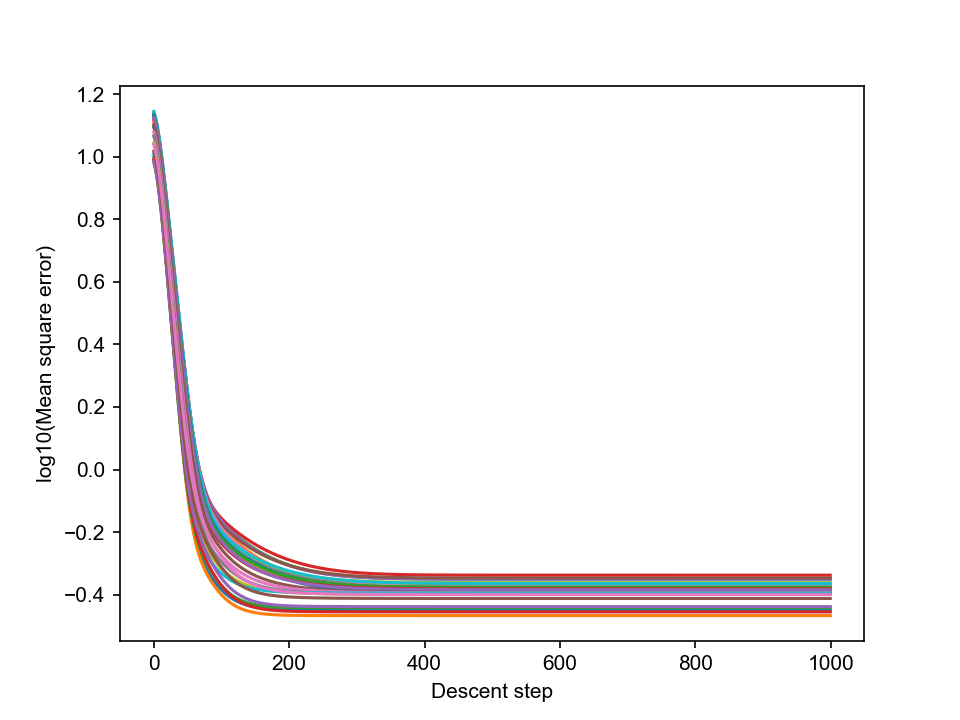

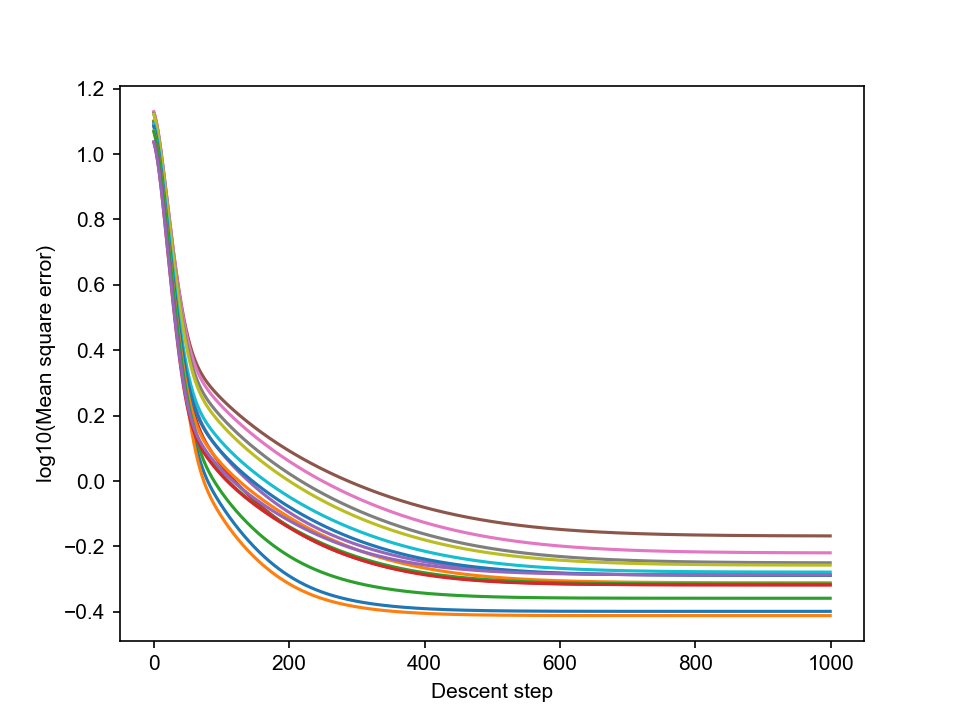

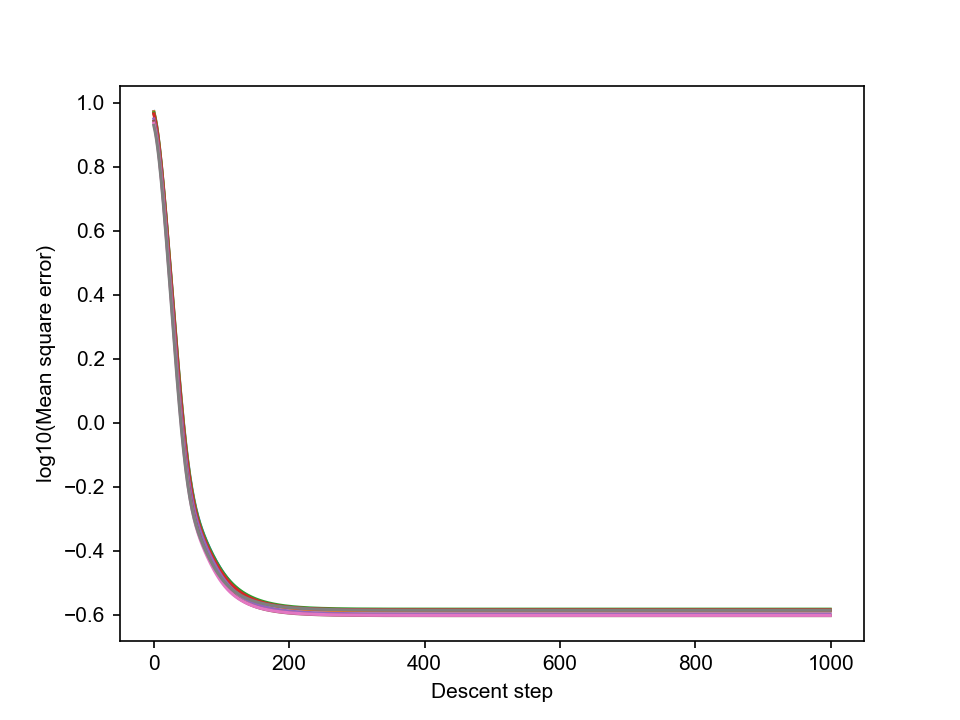

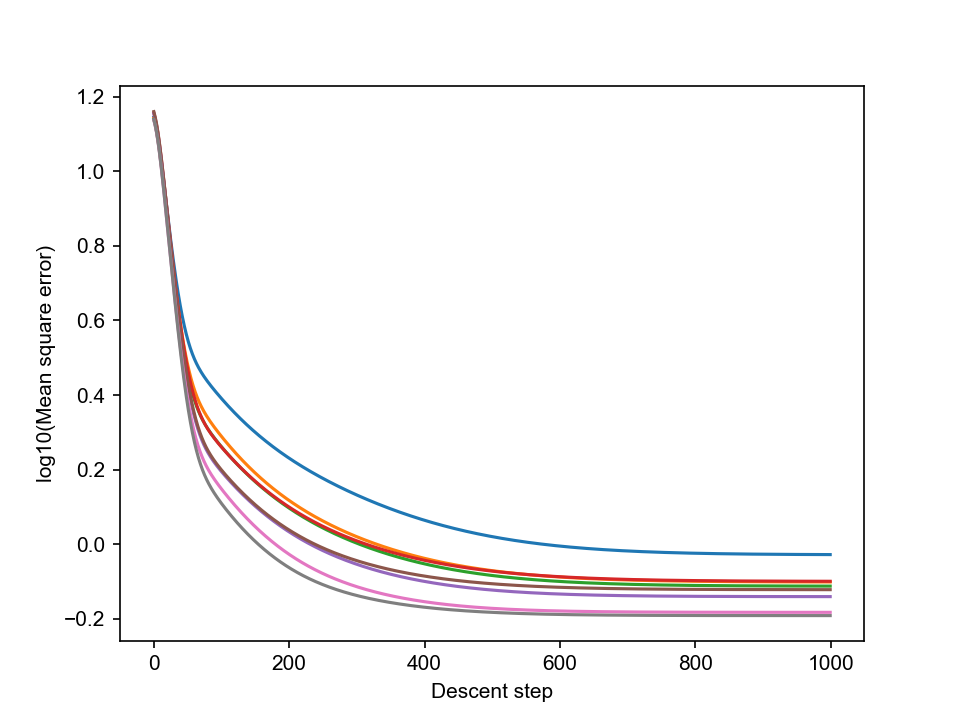

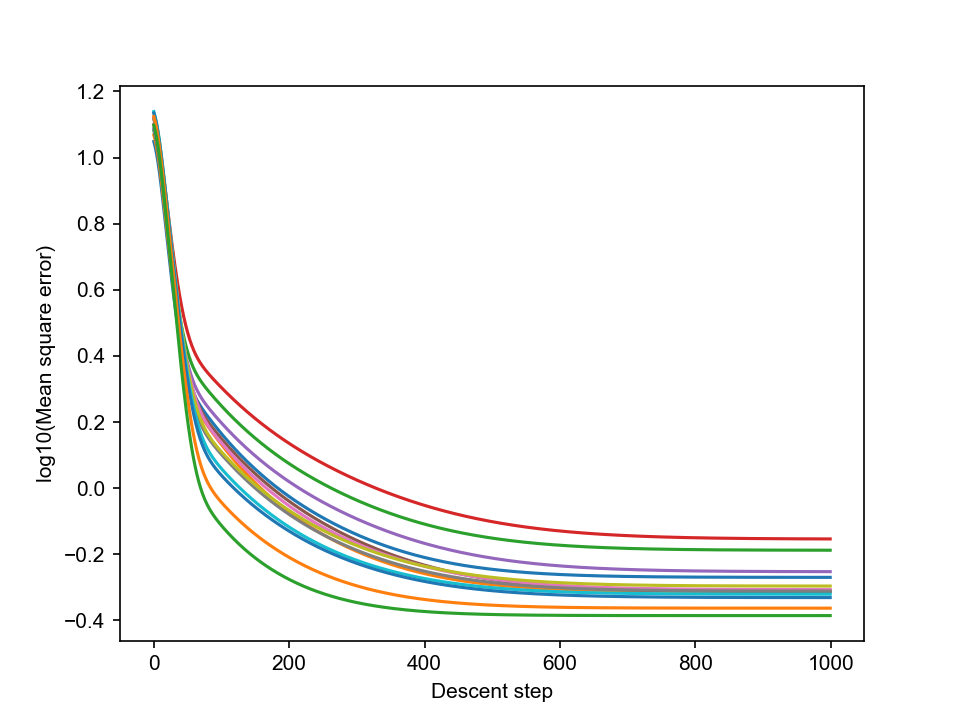

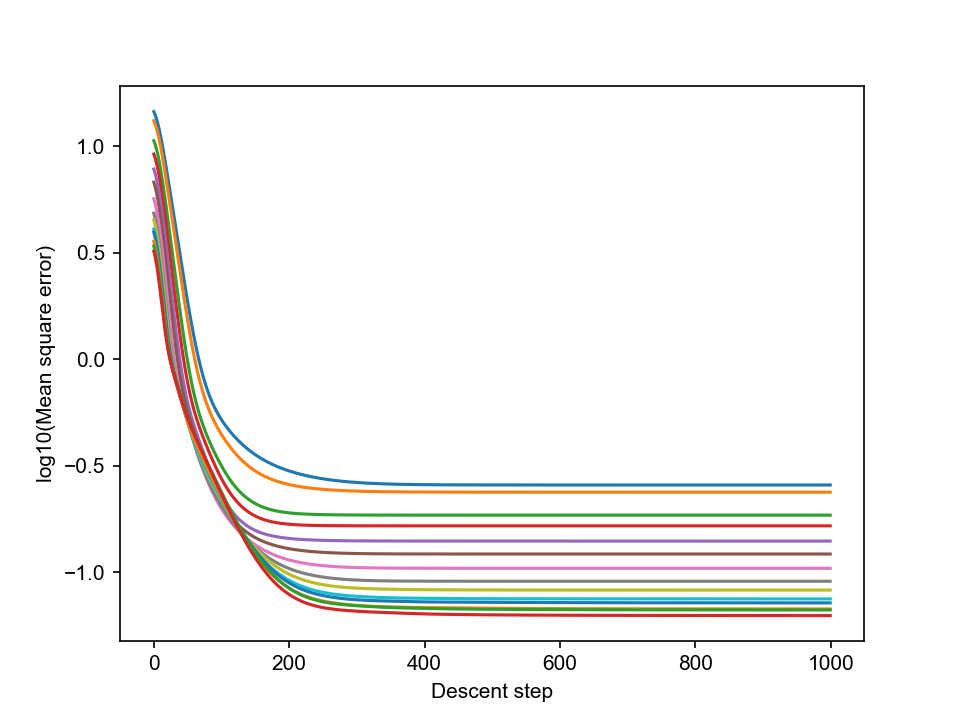

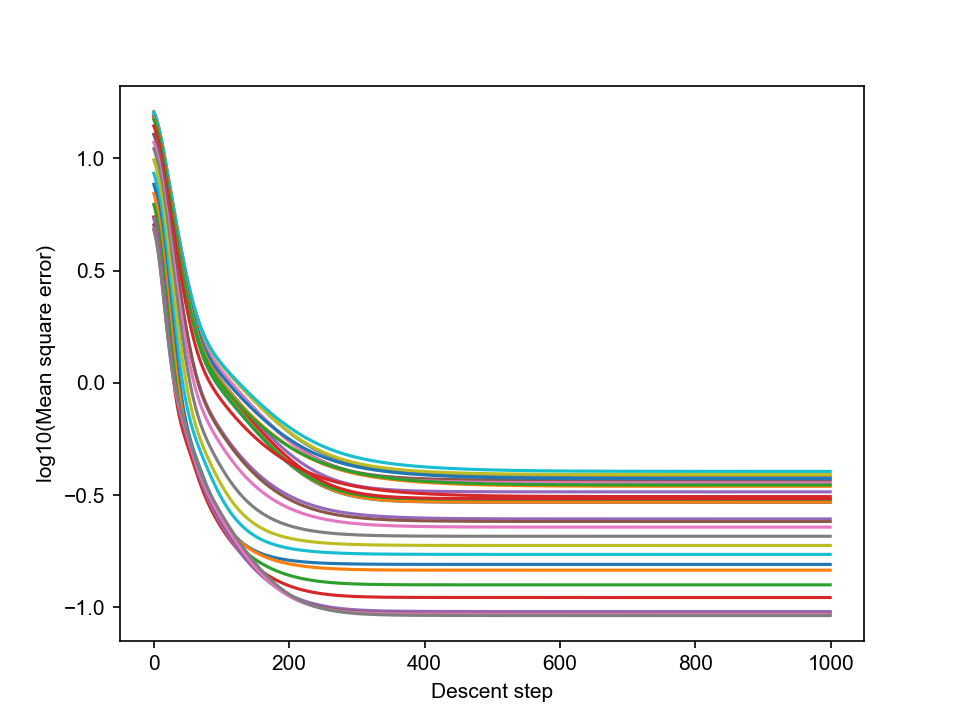

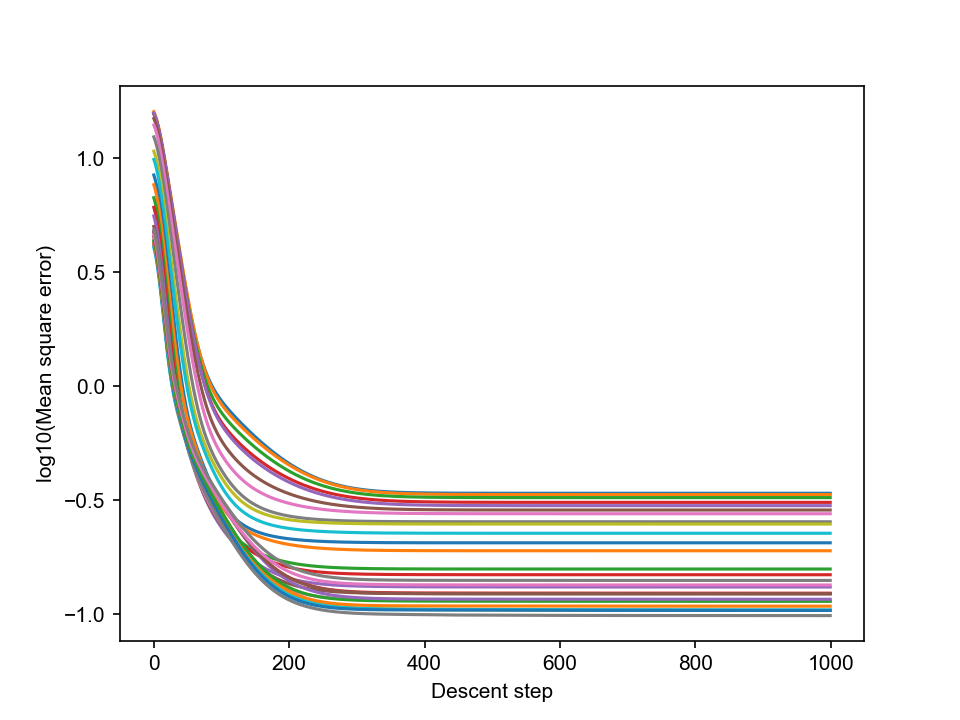

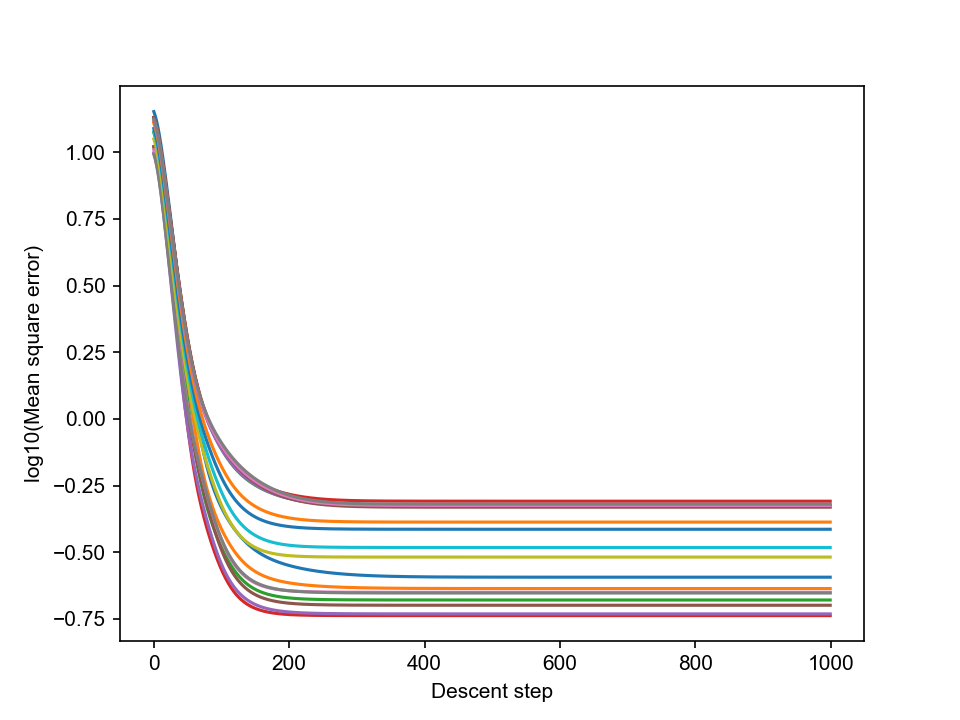

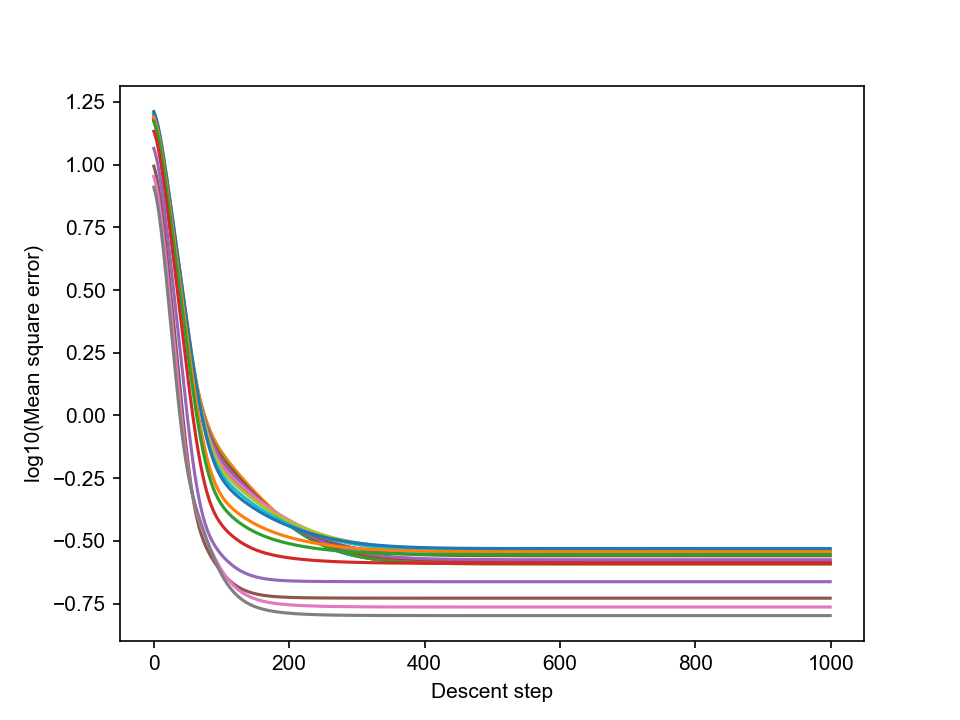

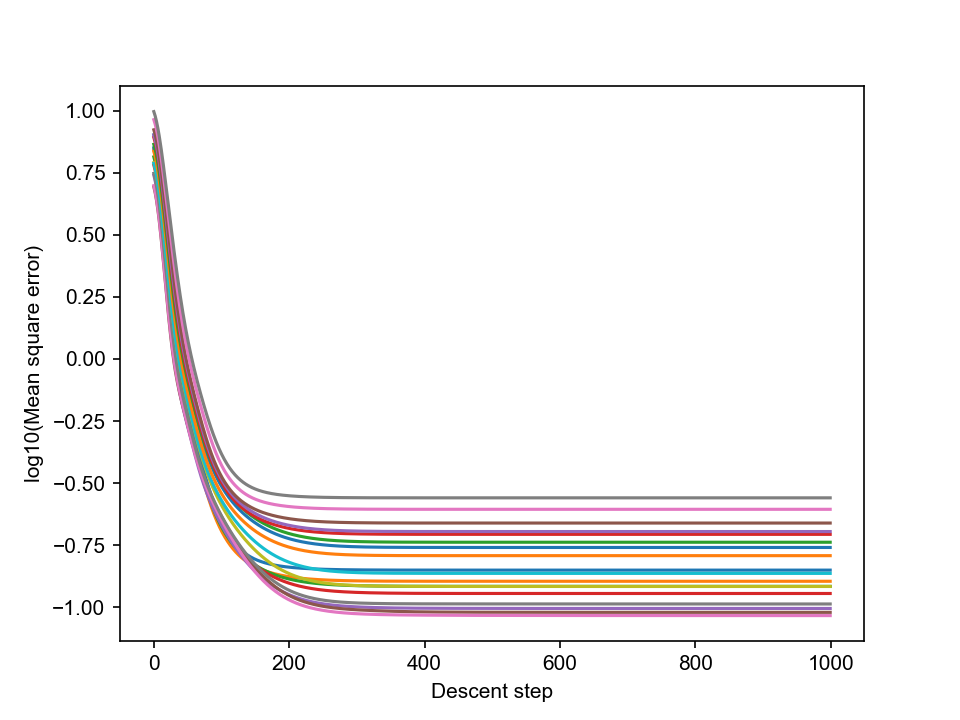

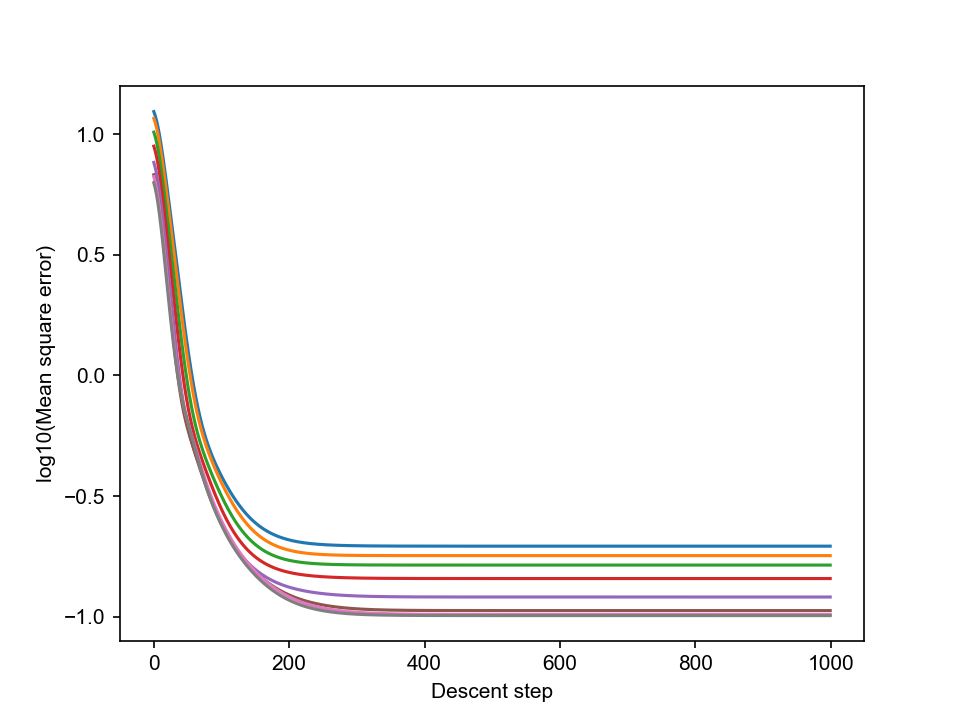

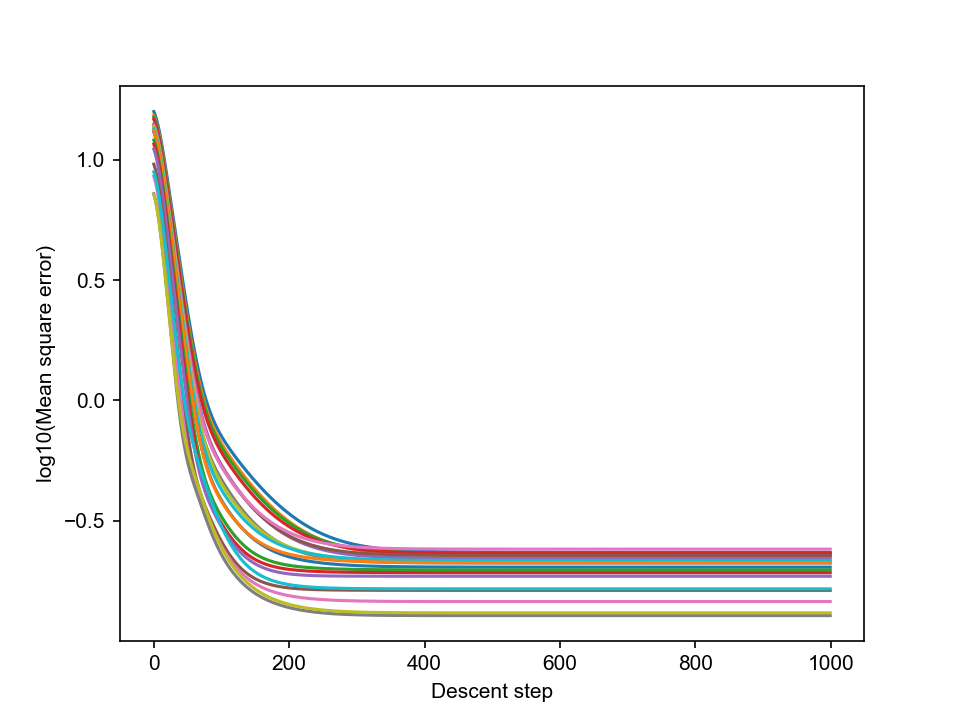

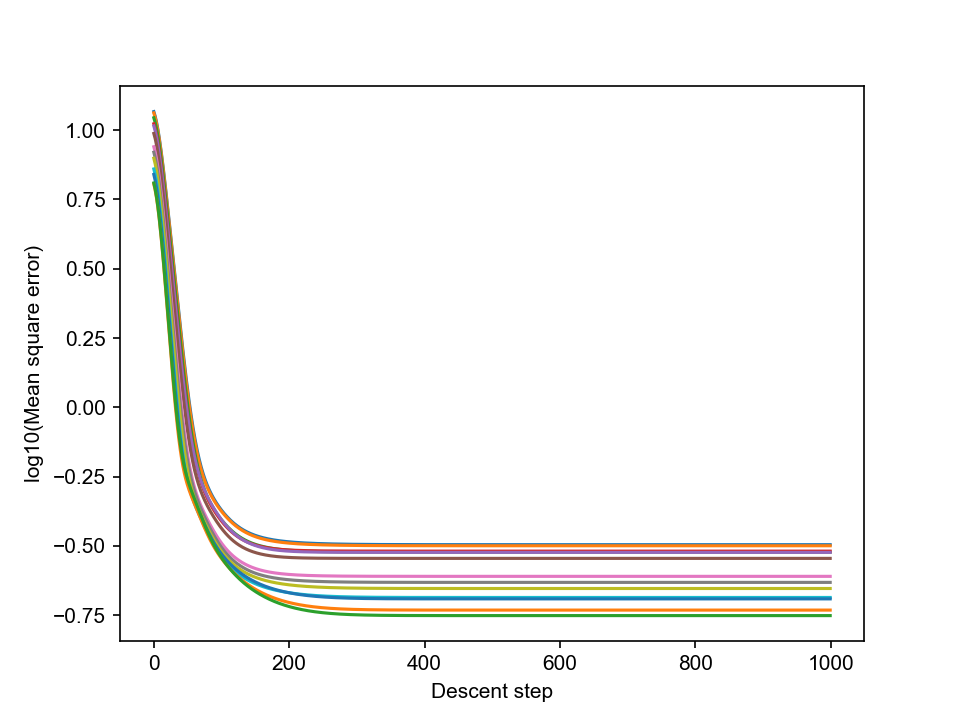

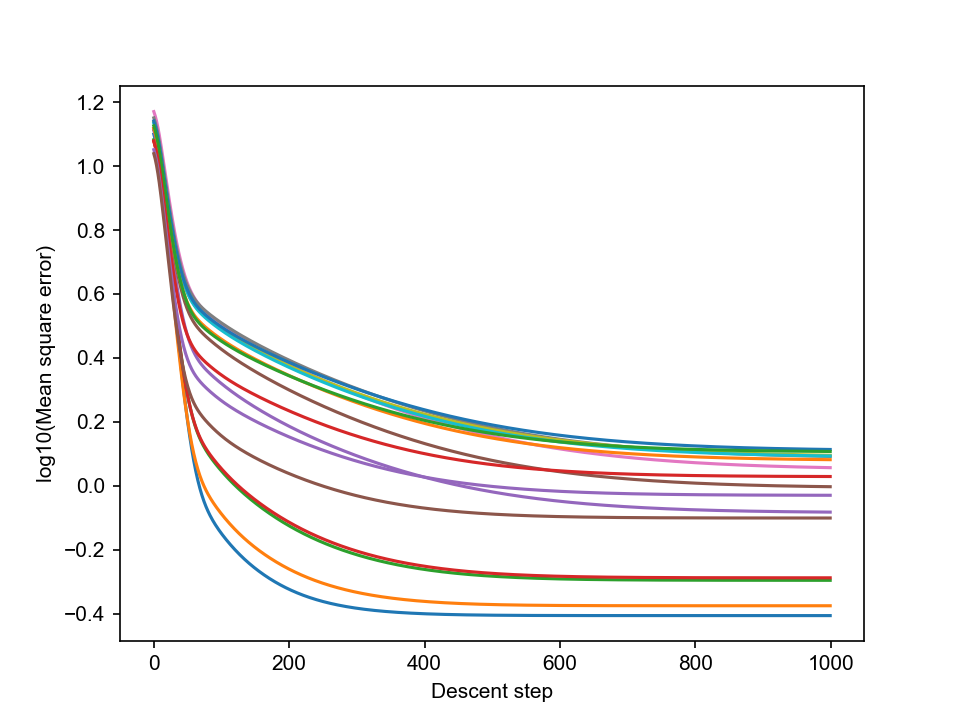

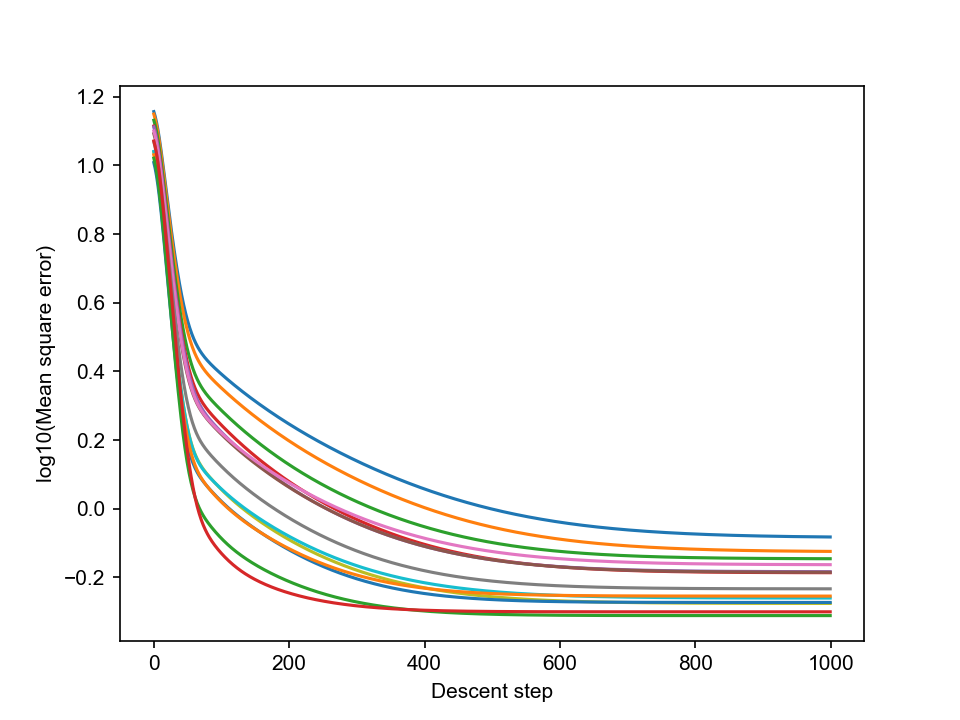

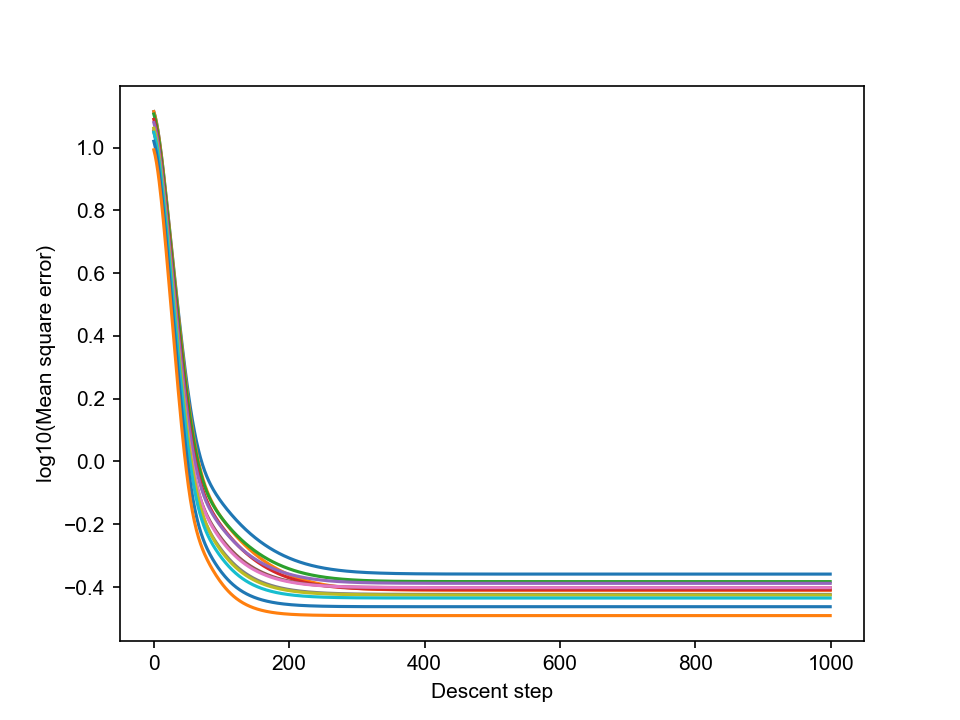

In [6]:
df = pd.read_csv("../../data/mlc4_embryos.csv")
df["Path"] = df["Path"].apply(lambda x: raw_data_path + x)
results = []
for index, row in df.iterrows():
    # print(row.Path)
    # print(row.EmbryoID)

    # Import movie
    img = load_image(row.Path + "/af_corrected.tif")
    roi = [np.loadtxt(row.Path + "/ROI_fit_%s.txt" % i) for i in range(img.shape[0])]

    # Run quantification
    iq = ImageQuant2(img=img, roi=roi, cytbg=cytbg, membg=membg)
    iq.quantify(descent_steps=1000)
    iq.plot_losses(log=True)

    # Compile results
    res = iq.compile_res(extra_columns={"Frame": np.arange(iq.nimgs)})
    res["EmbryoID"] = row.EmbryoID
    res["Membrane signal"] *= calibration_factor
    res = res.astype({"Frame": int})
    results.append(res)

### Combine dataframes

In [7]:
results_full = pd.concat(results)
results_full.to_csv("../../data/mlc4_quantification.csv", index=False)

### Filter out polar body

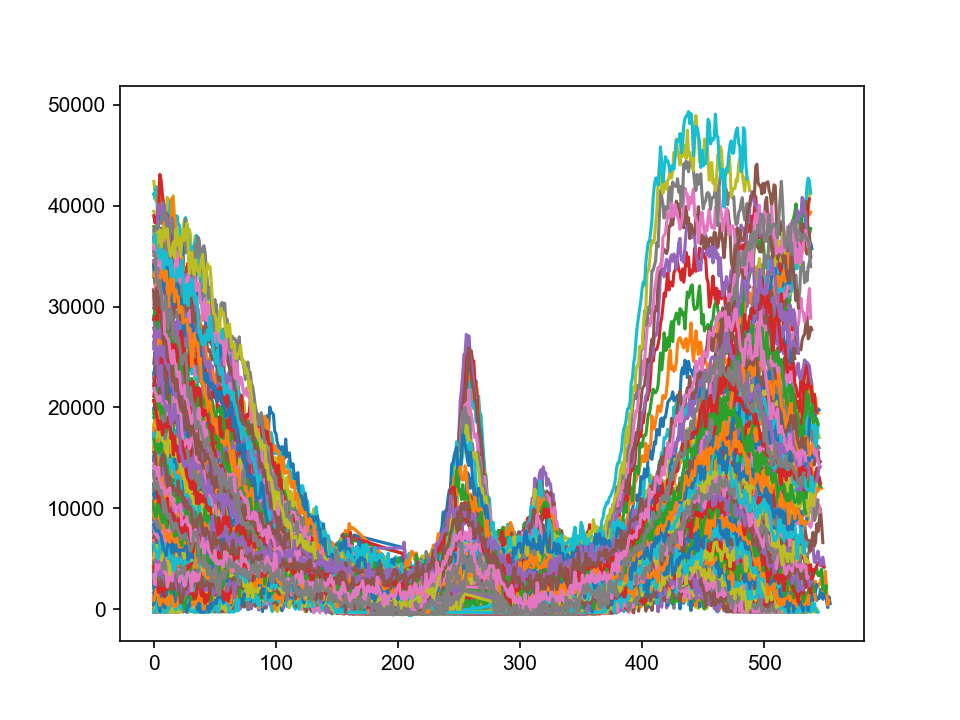

In [8]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]


fig, ax = plt.subplots()
results_full = pd.read_csv("../../data/mlc4_quantification.csv")
res_grouped = results_full.groupby(["EmbryoID", "Frame"])
for i, (g, r) in enumerate(res_grouped):
    path = df[df.EmbryoID == g[0]]["Path"].values[0]
    roi = np.loadtxt(path + "/ROI_fit_%s.txt" % g[1])
    _mems = r["Membrane signal"]
    mems = _mems.to_numpy()
    if os.path.exists(path + "/polar_body.txt"):
        polar_body = np.loadtxt(path + "/polar_body.txt")
        ind = int(
            mems.shape[0]
            * np.argmin(np.linalg.norm(roi - polar_body, axis=1))
            / roi.shape[0]
        )
        mems[ind - 20 : ind + 20] = np.nan
        nans, x = nan_helper(mems)
        mems[nans] = np.interp(x(nans), x(~nans), mems[~nans])
    ax.plot(mems)
    results_full.loc[_mems.index, "Membrane signal"] = mems
results_full.to_csv("../../data/mlc4_quantification_no_pb.csv", index=False)